<a href="https://colab.research.google.com/github/9105507/APRENDIZAJE_AUTOMATICO_23_24/blob/main/Copia_de_PRACTICA_FINAL_COMUN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Grupo 7**
Miguel Ángel Rojo

Miguel Poyatos García-Lorenzana

Jorge Barcenilla González


 - https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia


 - https://www.kaggle.com/code/madz2000/pneumonia-detection-using-cnn-92-6-accuracy


**QUITAR ESTO ANTES DE ENTREGAR!!**

Definir el problema y montar un conjunto de
datos
- ¿Cuáles serán los datos de entrada?¿Qué estamos intentando predecir?
(Disponibilidad de datos es el factor limitante de esta fase)
- ¿A qué tipo de problema nos estamos enfrentando?: clasificación binaria,
clasificación multiclase, regresión escalar, regresión vectorial, clasificación
multiclase y multietiqueta, clustering, generación o aprendizaje por refuerzo…
(tipo de problema -> arquitectura del modelo, función de pérdida, etc.)
- Caracterizar entradas y las salidas. Hipótesis:
  -  Las salidas pueden predecirse con las entradas dadas
  -  Los datos son lo bastante informativos como para aprender la relación
entre entradas y salidas
  -  Modelo operativo -> verificará las hipótesis. No todo es resoluble
- Problemas sin solución: Problemas “no estacionarios” (recomendador de ropa,
movimientos de una acción en la bolsa dado historial precios)
- Utilizar M.L. entrenando con datos pasados para predecir el futuro es asumir
que el futuro se comportará como el pasado (no suele ser el caso)

# 1.0 Introducción

En este proyecto se van a desarrollar distintas Redes Neuronales Convolucionales con el objetivo de principal de crear modelos que sepan detectar neumonía e incluso que sepan diferenciar entre distintos tipos de neumonía.

Para ello, se ha utilizado [una base de datos de Kaggle](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia) la cual guarda imágenes de radiografías torácicas de distintos pacientes, las cuales están divididas en las siguientes clases:

  | Clase                   | Codificación|
  |-------------------------|-------------|
  | Normal                  | 0           |
  | Bacterial Pneumonia     | 1           |
  | Viral Pneumonia         | 2           |


Y las cuales tienen la siguiente forma:

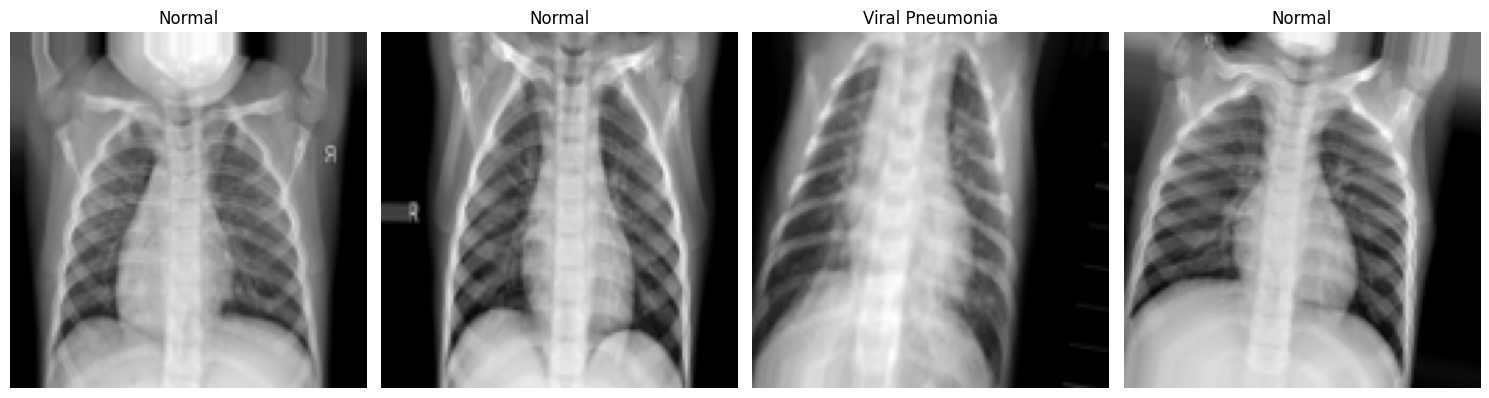


## 1.1 Contexto
La neumonía es una enfermedad pulmonar prevalente y una de las principales causas de mortalidad en todo el mundo. Con datos de hasta el 2021, la pneumonía afecta al siete por ciento del total mundial, matando a unos 4 millones de personas cada año. [[Fuente]](http://www.scielo.org.bo/scielo.php?script=sci_arttext&pid=S2664-32432021000300003#:~:text=Anualmente%2C%20la%20neumonía%20afecta%20aproximadamente,de%20Asia%20y%20África%20subsahariana.)

En la actualidad, hay diversas técnicas de diagnóstico por imagen disponibles. Aunque muchas de ellas son cada vez más precisas, debido a consideraciones de costo y rapidez, las radiografías torácicas suelen ser la herramienta principal para la detección de infecciones pulmonares


## 1.2 Objetivos:
Nuestros objetivos con este proyecto son los siguientes:

- Construir un modelo de inteligencia artificial que tenga una capacidad precisa de detectar signos de neumonía en imágenes de radiografías pulmonares, con altos niveles de sensibilidad y especificidad.

- Conseguir que nuestro modelo consiga diferenciar entre neumonía vírica y bacteriana (se verá más adelante que aquí es donde se encuentra el mayor reto en este problema).

- Análisis e Interpretación Rápida de Resultados: Proporcionar un mecanismo para analizar e interpretar rápidamente los resultados del diagnóstico, asistiendo a los profesionales de la salud en la toma de decisiones y la planificación del tratamiento.


## 1.3 Método:

Esta base de datos (después de descartar algunas imágenes) tiene 5840 imágenes en total. Cada imagen viene en una resolución distinta, por lo que, cuando se lean y guarden todas las imágenes, se convertirán todas a tamaño 128x128.

Se va a afrontar el problema de dos maneras para conseguir la capacidad de clasificar radiografías torácicas en formato JPEG.:  

1.   Creando un modelo CNN de clasificación multiclase que intente predecir entre las tres clases existentes: normal, neumonía bacteriana y neumonía vírica.

                | Clase                   | Codificación |
                |-------------------------|--------------|
                | Normal                  | 0            |
                | Pneumonia Bacterial     | 1            |
                | Pneumonia Virica        | 2            |

2.   Creando dos modelos CNN de clasificación binaria:

    *   Uno para clasificar una imagen entre imagenes de pacientes sanos y enfermos, es decir, entre las siguientes clases:

                | Clase                   | Codificación |
                |-------------------------|--------------|
                | Normal (SANO)           | 0            |
                | Pneumonia (ENFERMO)     | 1            |

    *   Y otro modelo de clasificación binaria en el que se intente clasificar entre los tipos de neumonía, es decir, entre las siguientes clases:

                | Clase                   | Codificación |
                |-------------------------|--------------|
                | Bacterial Pneumonia     | 0            |
                | Viral Pneumonia         | 1            |

## 1.4 Resultados esperados
Lo ideal sería desarrollar un sistema capaz de ayudar en pie de guerra en un hospital para facilitar la toma de decisión a doctores y radiólogos evitando errores perjudiciales.


## 1.5 Valor diferencial
Gracias a ML y debido a la complicación de la visión humana para diagnosticar el tipo de enfermedad según las radiologías, se propone ofrecer un sistema que sirva de herramienta, para ofrecer más información al radiólogo o doctor.

Hasta ahora la mayoría de investigaciones se han centrado únicamente en distinguir al paciente enfermo del sano y en esta se pretende también diferenciar el tipo de pneumonia del paciente, siendo esto una tarea de mayor calibre.

# 2.0 Informe de radiología para la neumonía

La neumonía se refiere a una infección dentro del pulmón y resulta en la acumulación de líquido infeccioso y pus en los espacios alveolares. Esto inicialmente provoca una opacificación parcheada del espacio aéreo y luego una consolidación más confluyente.


Las radiografías torácicas son la herramienta más utilizada para el diagnóstico de neumonía debido a su velocidad y asequibilidad. Presentan ciertas limitaciones en la resolución de la imagen, ya que pueden mostrar opacidades o tonalidades grises difusas.

Estas opacidades definen la densidad del material que se fotografía, es por eso que los huesos, de gran densidad, se ven claramente en las radiografías.

La acumulación de líquido infeccioso y pus en los espacios alveolares es observable a simple vista debido a su diferencia de densidad respecto del aire de los pulmones. Se ven unos ejemplos a continuación:


## 2.1 Neumonía Bacteriana:
Suelen estar caracterizadas por la acumulación de pus o líquido infeccioso en una zona más local, en la imagen se puede observar que el aumento de densidad esta en el pulmón derecho en la parte superior, y se diferencia a simple vista.


*Ilustración 1: Streptococcus pneumonia (bacteria) Cortesía de Yaïr Glick, Radiopaedia.org, rID: 68055*

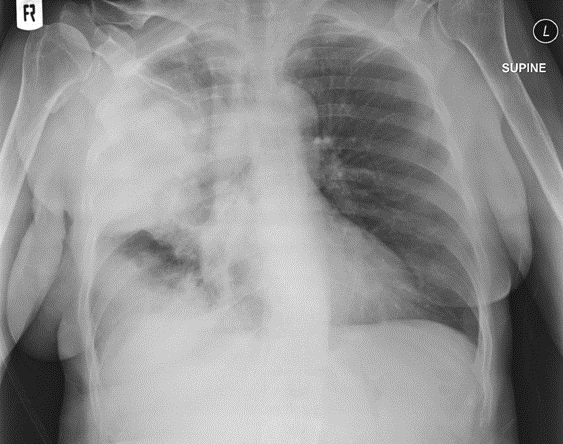

## 2.3 Neumonía Vírica:
A diferencia de las infecciones bacterianas, las víricas suelen afectar a los pulmones de una manera más general. En la siguiente imagen se pueden observar los daños, más generales, claramente.

*Ilustración 2: influenza A pneumonia (Virus) Cortesía de Joachim Feger, Radiopaedia.org, rID: 75217*

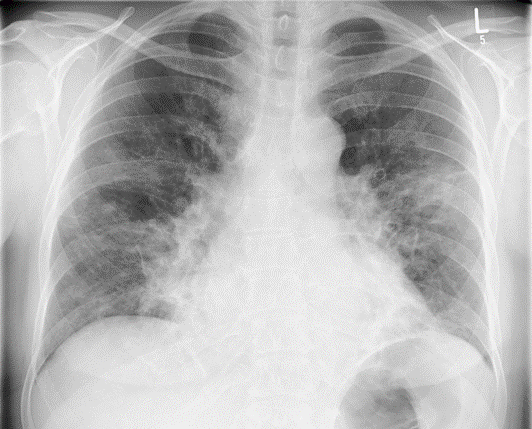

## 2.3 A tener en cuenta

Sin embargo, la realidad es que la radiografía de tórax y la tomografía computarizada no pueden diferenciar entre neumonía bacteriana y neumonía no bacteriana.

También hay una gran superposición de características de imagen con procesos no neumónicos.

Otro factor para tener en cuenta es la posibilidad de que los dos tipos de infecciones estén presentes en el mismo individuo.

Por esto, se intenta predecir entre los dos tipos de neumonía pero se sabe que hay más factores médicos que se podrían tener en cuenta para conseguir una clasificación satisfactoria.

# 3.0 Bibliotecas y funciones utilizadas

In [1]:
# Bloque 1: Librerías para la descarga del archivo
import zipfile
import io
from io import BytesIO
from PIL import Image

# Bloque 2: Librerías para el desarrollo de la Red Neuronal Artificial (RNA)
from keras import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.optimizers import SGD, RMSprop
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau, Callback, EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras import utils
from keras.utils import to_categorical
from keras import backend as K

# Bloque 3: Librerías para visualización de dataset
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Bloque 4: Librerías para manipulación de datos
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,confusion_matrix
import random

# Bloque 5: Librerías para manejo de imágenes
import cv2
import os

# Bloque 6: Otros
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import gc

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


Visualización de la imagen junto con su predicción y resaltando si la predicción es correcta o no:

In [2]:
def plot_image(i, predictions_array, true_label, img):

  # Parámetros de entrada:
  #   - i: Índice de la imagen que se va a mostrar
  #   - predictions_array: Array con las predicciones de las clases
  #   - true_label: Etiqueta verdadera de la imagen
  #   - img: Matriz que representa la imagen

  predictions_array, true_label, img = predictions_array, true_label[i], img[i]

  # Configuración del gráfico
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  # Mostrar la imagen en escala de grises
  plt.imshow(img, cmap=plt.cm.binary)

  # Obtener la etiqueta predicha
  predicted_label = np.argmax(predictions_array)

  # Configurar el color del texto según la predicción correcta o incorrecta
  if predicted_label == true_label:
      color = 'green'
  else:
      color = 'red'

  # Mostrar información sobre la predicción y la etiqueta verdadera
  plt.xlabel("{}[{:1.0f}] {:2.0f}% \n({}[{:1.0f}])".format(class_names[predicted_label],
                              predicted_label,
                              100*np.max(predictions_array),
                              class_names[true_label],
                              true_label),
                              color=color)

Visualización del proceso de aprendizaje de un modelo durante el entrenamiento tanto en los datos de entrenamiento como en los datos de validación:

In [3]:
def evaluar_rendimiento_validacion(train_loss, train_acc, val_loss, val_acc):
    """
    Evalúa el rendimiento del modelo en términos de pérdida y precisión durante el entrenamiento y la validación.

    Parámetros de entrada:
      - train_loss: Lista de pérdidas en el conjunto de entrenamiento por época.
      - train_acc: Lista de precisión en el conjunto de entrenamiento por época.
      - val_loss: Lista de pérdidas en el conjunto de validación por época.
      - val_acc: Lista de precisión en el conjunto de validación por época.

    La función genera dos gráficas:
      1. Gráfica de Pérdida: Muestra la pérdida de entrenamiento y validación a lo largo de las épocas.
      2. Gráfica de Precisión: Muestra la precisión de entrenamiento y validación a lo largo de las épocas.
    """
    # Configuración de la figura para las gráficas
    fig, axs = plt.subplots(1, 2, figsize=(14, 8))

    # Gráfica de pérdida
    axs[0].plot(range(1, len(train_loss) + 1), train_loss, 'go-', label='Pérdida de entrenamiento')
    axs[0].plot(range(1, len(val_loss) + 1), val_loss, 'ro-', label='Pérdida de validación')
    axs[0].set_xlabel('Época')
    axs[0].set_ylabel('Pérdida')
    axs[0].legend()
    axs[0].set_title('Gráfica de Pérdida')

    # Gráfica de precisión
    axs[1].plot(range(1, len(train_acc) + 1), train_acc,'g-o', label='Precisión de entrenamiento')
    axs[1].plot(range(1, len(val_acc) + 1), val_acc,'ro-', label='Precisión de validación')
    axs[1].set_xlabel('Época')
    axs[1].set_ylabel('Precisión')
    axs[1].legend()
    axs[1].set_title('Gráfica de Precisión')

    # Mostrar las gráficas
    plt.show()

Visualiza en una gráfica la predicción devuelta por el modelo de una imagen como una distribución de probabilidades:

In [4]:
def plot_value_array(i, predictions_array, true_label):
    """
    Visualiza el arreglo de predicciones y resalta la predicción correcta o incorrecta.

    Parámetros de entrada:
      - i: Índice de la muestra en el conjunto de datos.
      - predictions_array: Arreglo de predicciones del modelo para la muestra i.
      - true_label: Etiqueta verdadera de la muestra i.

    La función genera un gráfico de barras que representa las predicciones del modelo para cada clase.

    Si la predicción es correcta, la barra correspondiente a la clase predicha se resalta en verde;
    de lo contrario, se resalta en rojo.

    """
    # Establecer las predicciones y la etiqueta verdadera
    predictions_array, true_label = predictions_array, true_label[i]

    # Configuración del gráfico
    plt.grid(False)
    plt.xticks(range(10))  # Suponemos que hay 10 clases; ajustar si es necesario
    plt.yticks([])

    # Crear un gráfico de barras con colores grises
    thisplot = plt.bar(range(len(predictions_array)), predictions_array, color="#777777")
    plt.ylim([0, 1])  # Establecer el rango del eje y entre 0 y 1, ya que son probabilidades

    # Obtener la etiqueta predicha por el modelo
    predicted_label = np.argmax(predictions_array)

    # Resaltar la barra correspondiente a la predicción (verde si es correcta, rojo si es incorrecta)
    if predicted_label == true_label:
        thisplot[predicted_label].set_color('green')
    else:
        thisplot[predicted_label].set_color('red')

Visualiza una matriz de confusión.

In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Visualiza una matriz de confusión.

    Parámetros de entrada:
      - cm: Matriz de confusión. Debe ser cuadrada y su dimensión debe ser igual al número de clases.
      - classes: Lista de etiquetas de clases.
      - normalize: Indica si la matriz de confusión debe ser normalizada.
      - title: Título de la gráfica.
      - cmap: Mapa de colores a utilizar en la gráfica.

    La función genera una representación visual de la matriz de confusión, resaltando las relaciones entre las
    clases verdaderas y las predicciones del modelo.

    """
    # Configuración de la gráfica
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Normalizar la matriz de confusión si se especifica
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Configuración de umbrales y texto en las celdas
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # Configuración adicional de la gráfica
    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

    # Mostrar la gráfica y limpiar el dibujo actual
    plt.show()
    plt.clf()

# 4.0 Carga y procesado de las imágenes

Con el objetivo de subir nuestros datos y poder manejarlos y manipularlos, estos se han descargado de la página web de Kaggle mencionada anteriormente (viene en formato .zip), después se han subido a Google Drive y se han guardado en una carpeta denominada 'Ingeniería Matemática'. De esta manera, con distintas bibliotecas de python que permiten leer contenido de Google Drive y archivos .zip, se han extraido las imágenes y guardado en dos variables, una para las imágenes y otra para las etiquetas.

Además, se han realizado dos lecturas de las imágenes, en la primera simplemente se almacenan las imágenes y sus etiquetas. En la segunda, por cada imagen, se guarda también otras dos, la segunda es la imagen transformada a una con alto brillo y contraste, y la tercera a una con alto brillo y bajo contraste. De esta manera, en la segunda lectura estaríamos creando una base de datos con el atributo 'shape' = (5840, 128, 128, 3). Esto se explicará y visualizará detalladamente en el apartado 'Ingeniería de características', y, de manera breve, se necesita porque en el modelo multiclase se ha decidido utilizar los datos de la primera lectura y en los dos modelos binarios se utilizarán los datos de la segunda lectura.

En primer lugar, se verifica la versión instalada de la biblioteca que estamos utilizando, Tensorflow.

In [6]:
if tf.__version__ < "2.0.0":
  print('La versión de tensorflow no es la adecuada')

print(tf.__version__)

2.15.0


## Primer conjunto de datos:

### 4.1 Carga de las imágenes

Se pide permiso al usuario a acceder a Google Drive con el fin de acceder a los datos del proyecto:

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Y se ejecuta el código que lee y guarda los datos con los que se va a trabajar en el modelo multiclase:

In [8]:
archivo_zip = '/content/drive/MyDrive/Ingeniería Matemática/DataSet.zip'

# Si no está instalada la librería 'pillow', descomentar esto:
#!pip install pillow

# Lectura del archivo zip
with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
    # Extract the contents of the ZIP file
    zip_ref.extractall('/content/')

    # Lista de nombres de archivos en el archivo ZIP
    file_list = zip_ref.namelist()

# Visualización de la variable 'file_list':
file_list[500:505]

# Se comprueba que se tienen los archivos correspondientes:
os.listdir('/content/')

# Se crean listas para almacenar los datos de las imágenes y las etiquetas
images = []
labels = []

# Se leen y guardan los datos con el siguiente código:
with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
    for file_info in file_list:
        # Se verifica que el archivo sea una imagen JPEG
        if file_info.lower().endswith('.jpeg') or file_info.lower().endswith('.jpg'):

            # Comprobamos la etiqueta
            if 'bacteria' in file_info:
              label = 1
            elif 'virus' in file_info:
              label = 2
            else:
              label = 0 # ES NORMAL

            # Se lee y procesa cada imagen en el archivo ZIP
            with zip_ref.open(file_info) as file:
                img = Image.open(BytesIO(file.read()))
                img = img.resize((128, 128))  # Ajusta el tamaño según sea necesario

                # Se convierte la imagen a escala de grises
                img = img.convert('L')

                # Pasamos de PIL a ARRAY
                img_array = np.array(img)

                # Se invierten los colores de la imagen
                img_array = np.invert(img_array)

                # Se agregan los datos de la imagen y la etiqueta a las listas
                images.append(img_array)
                labels.append(label)

# Se convierte las listas en arrays de NumPy
images = np.array(images)
labels = np.array(labels)

# Se realiza el reshape para agregar la dimensión adicional necesaria más adelante
images = np.reshape(images, (images.shape[0], images.shape[1], images.shape[2], 1))

# Se comprueba el tamaño de los datos
print(images.shape)
print(labels.shape)

# Liberamos memoria
del img
del img_array
del label

(5840, 128, 128, 1)
(5840,)


### 4.2 Visualización de imágenes:

Una vez ya se han cargado las imágenes, se procede a visualizarlas. En primer lugar, se visualizan las imágenes de la primera carga de datos (variables 'images' y 'labels'):

In [9]:
# Listas necesarias para la visualización de datos
class_names = ['Normal',
               'Bacterial Pneumonia',
               'Viral Pneumonia']
class_names_1 = ['Normal',
               'Pneumonia']
class_names_2 = ['Bacterial Pneumonia',
               'Viral Pneumonia']

Se visualizan 4 imágenes aleatorias de nuestra base de datos junto con sus resectivas clases:

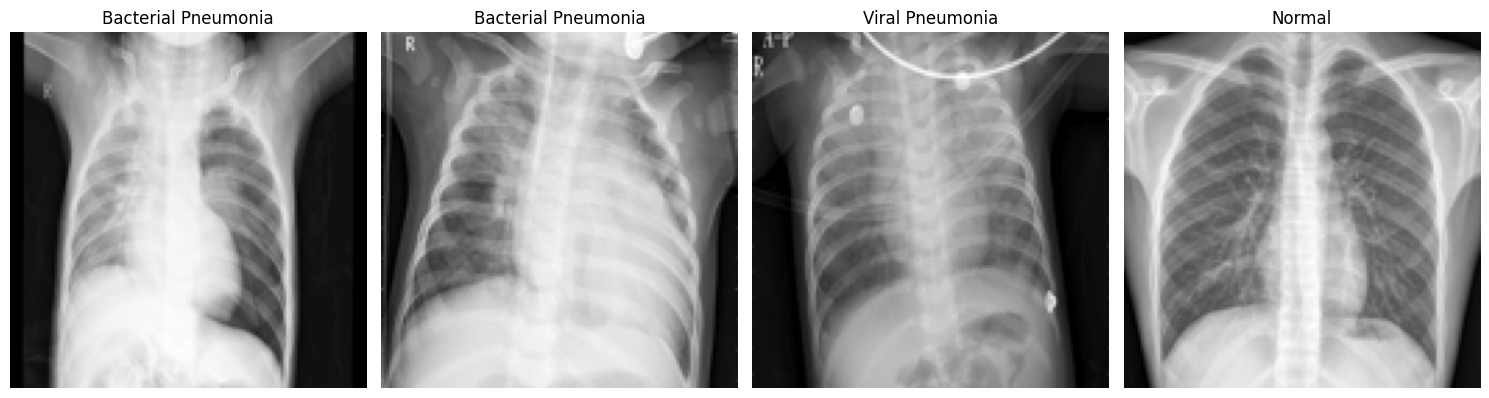

In [10]:
import matplotlib.pyplot as plt

# Generar 4 números aleatorios
num_images = np.random.randint(0, len(images), 4)


# Crea un subplot con 2 columnas y la cantidad de filas necesarias
fig, axes = plt.subplots(1, len(num_images), figsize=(15, 5))

# Itera sobre las primeras imágenes elegidas aleatoriamente y sus etiquetas
for i in range(len(num_images)):
    axes[i].imshow(images[num_images[i]], cmap=plt.cm.binary)
    axes[i].set_title(class_names[labels[num_images[i]]])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Liberamos memoria
del num_images

También, se muestran 25 imágenes aleatorias con sus respectivas clases:

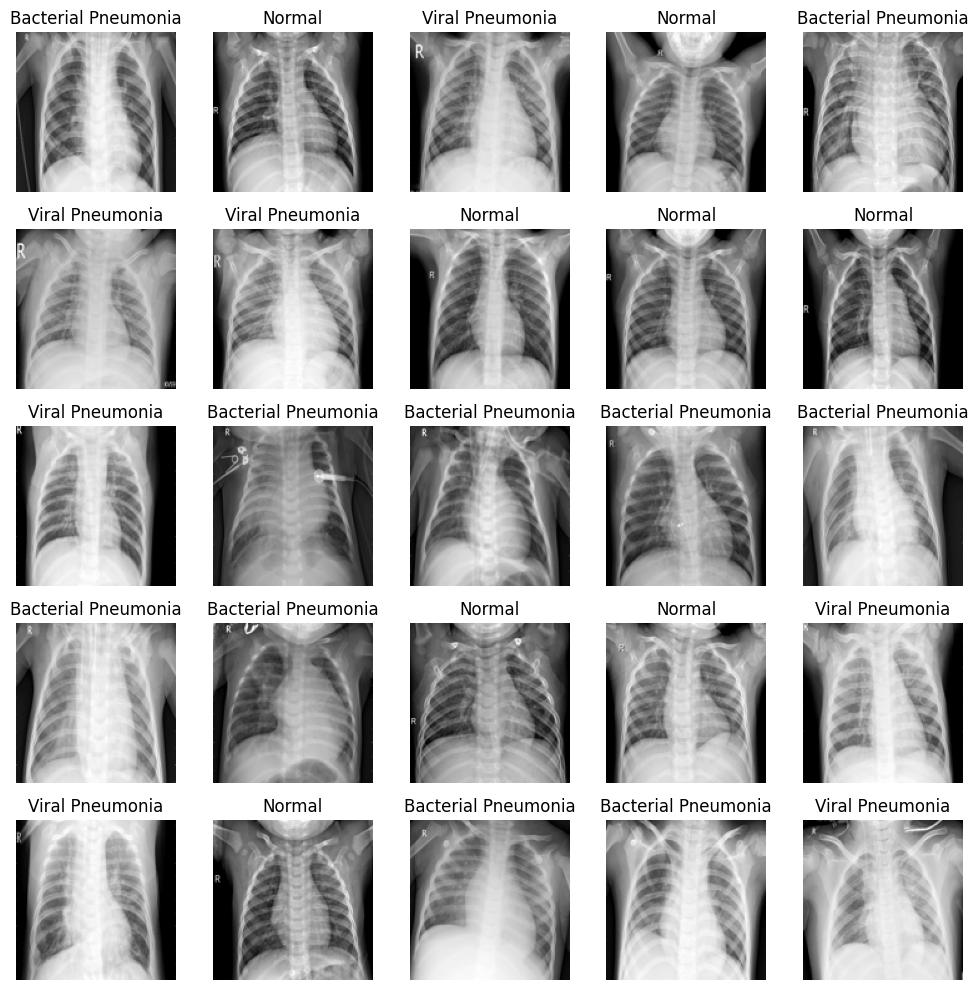

In [11]:
fig, axes = plt.subplots(5, 5, figsize=(10,10))

# Rellenar el subplot con imágenes aleatorias
for i in range(5):
    for j in range(5):
        # Seleccionar un índice aleatorio
        idx = np.random.randint(len(images))
        # Mostrar la imagen correspondiente en el subplot
        axes[i, j].imshow(images[idx], cmap=plt.cm.binary)
        axes[i,j].set_title(class_names[labels[idx]])
        # Eliminar los ejes para una mejor visualización
        axes[i, j].axis('off')
plt.tight_layout()
plt.show()

# Liberamos memoria
del idx

Algo muy importante es comprobar que nuestras clases estén equilibradas:

In [12]:
index_count = Counter(labels)
sorted_indices = sorted(index_count.items())
for index, count in sorted_indices:
    print(f'{class_names[index]}: {count}')

# Liberamos memoria
del index_count
del sorted_indices

Normal: 1575
Bacterial Pneumonia: 2772
Viral Pneumonia: 1493


Se observa que los datos de no están balanceados con respecto a sus clases. Se sabe que esto conlleva sesgos y para evitar estos problema, se plantean dos posibles técnicas para balancear los datos.

### 4.3 Equilibrar imágenes

#### Equilibrar eliminando imágenes

La primera técnica que se planteó, **y la que se ha decidido usar en los dos tipos de modelo**, es equilibrar las clases reduciendo el número de ellas hasta que estén balanceadas. Esto se condigue con el siguiente código:

In [13]:
# Número de instancias que se quiere por clase
num_instancias = 1490 #Aquí se pone el nº que se decida

# Se crean listas vacías para las nuevas imágenes y etiquetas
new_images = []
new_labels = []

# Iterar sobre cada clase
for i in range(len(np.unique(images))):
    # Se obtiene el nº de índices de la clase actual
    indices = np.where(labels == i)[0]
    # Si la clase tiene más instancias que num_instancias, se reduce
    if len(indices) > num_instancias:
        indices = np.random.choice(indices, num_instancias, replace=False)
    # Añadir las instancias seleccionadas a las nuevas listas
    new_images.extend(images[indices])
    new_labels.extend(labels[indices])

# Se convierten las listas a arrays de NumPy
new_images = np.array(new_images)
new_labels = np.array(new_labels)

# Se comprueba que las clases están equilibradas
index_count = Counter(new_labels)
sorted_indices = sorted(index_count.items())
for index, count in sorted_indices:
    print(f'{class_names[index]}: {count}')

# Liberamos memoria
del index_count
del sorted_indices
del num_instancias
del indices

Normal: 1490
Bacterial Pneumonia: 1490
Viral Pneumonia: 1490


#### Equilibrar aumentando el nº de imágenes

También, se llegó a considerar esta posibilidad de aplicar data augmentation de manera manual, aumentando imágenes en las clases que tuviesen menos instancias  que la que más tuviese. En este caso la clase que más tenía era 'Bacterial Pneumonía' con 2772 imágenes, la idea era hacer que 'Normal' y 'Viral Pneumonía' también tuviesen 2772 imágenes mediante data augmentation.

No obstante, después de dabatir sobre cuál era la mejor estrategia a seguir, nos pusimos de acuerdo todos los miembros del equipo en que esta técnica era peor, no solo porque efectivamente ofrecía un peor rendimiento en las pruebas realizadas, sino que se llegó a la conclusión de que era mejor una base de datos con menos imágenes, pero cada una de ellas que sea completamente original, a una que tuviese más imágenes, pero no todas ellas originales (muchas de ellas construidas a partir de otras de la misma base de datos -> imágenes parecidas entre sí). Esto es porque nos dimos cuenta de que cada una de las imágenes originales aportaba mucho más valor e información que las generadas y, además, la técnica de dataaugmentation se utilizaría más adelante en los modelos desarrollados, por lo que tampoco tenía mucho sentido seguir por este camino.

Sin embargo, se deja el código que se desarrolló con el fin de probar esta técnica:

```python
# Número objetivo de imágenes por clase
target_num_images_per_class = 2772 #Aquí se pone el nº de la clase más alta

# Crear el generador de imágenes
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

# Clases existentes y sus respectivos números de imágenes
classes = [0, 1, 2]
num_images_per_class = [575, 1772, 493]

# Listas para las nuevas imágenes y etiquetas
new_images = []
new_labels = []

# Iterar sobre cada clase
for current_class, num_images in zip(classes, num_images_per_class):
    if current_class != 1:# Se pone 1 porque la clase uno ya tiene -> ->'target_num_images_per_class' imágenes
      # Determinar cuántas imágenes adicionales se deben generar
      images_to_generate = target_num_images_per_class - num_images

      # Seleccionar aleatoriamente imágenes de la clase actual
      class_indices = np.where(labels == current_class)[0]
      selected_indices = np.random.choice(class_indices, images_to_generate, replace=True)

      # Iterar sobre las imágenes seleccionadas y aplicar aumentos
      for index in selected_indices:
          x = images[index]
          x = x.reshape((1,) + x.shape)

          # Generar imágenes aumentadas
          for batch in datagen.flow(x, batch_size=1):
              augmented_image = batch[0]
              new_images.append(augmented_image)
              new_labels.append(current_class)
              break  # Solo necesitamos generar una imagen por cada iteración

# Convertir las listas a arrays de NumPy
new_images = np.concatenate((images, new_images))#, axis=0)
new_labels = np.concatenate((labels, new_labels))#, axis=0)


print("Generación y almacenamiento de nuevas imágenes completado.")

index_count = Counter(new_labels)
print("NEW TRAIN:")
sorted_indices = sorted(index_count.items())
for index, count in sorted_indices:
    print(f'{class_names[index]}: {count}')
```

### 4.4 Preparar y normalizar imágenes

A continuación, se realiza la división de todo el conjunto en uno del tipo 'train - validation - test':

In [14]:
# Primero, divide los datos en conjuntos de entrenamiento y temporal (que luego se dividirá en validación y prueba)
X, test_X, y, test_y = train_test_split(new_images, new_labels,
                                        test_size=0.2,
                                        random_state=89,
                                        shuffle=True,
                                        stratify=new_labels)

# Luego, divide los datos temporales en conjuntos de validación y prueba
train_X, val_X, train_y, val_y = train_test_split(X, y,
                                                  test_size=0.2,
                                                  random_state=89,
                                                  shuffle=True,
                                                  stratify=y)

#Liberamos memoria
del images
del labels
del X
del y

Y se comprueba el balanceo de las clases tras la división en cada uno de los subconjuntos:

In [15]:
index_count = Counter(train_y)
print(" -> TRAIN:")
sorted_indices = sorted(index_count.items())
for index, count in sorted_indices:
    print(f'{class_names[index]}: {count}')

#Liberamos memoria
del index_count
del sorted_indices

 -> TRAIN:
Normal: 953
Bacterial Pneumonia: 954
Viral Pneumonia: 953


In [16]:
index_count = Counter(val_y)
print(" -> VAL:")
sorted_indices = sorted(index_count.items())
for index, count in sorted_indices:
    print(f'{class_names[index]}: {count}')

#Liberamos memoria
del index_count
del sorted_indices

 -> VAL:
Normal: 239
Bacterial Pneumonia: 238
Viral Pneumonia: 239


In [17]:
index_count = Counter(test_y)
print(" -> TEST:")
sorted_indices = sorted(index_count.items())
for index, count in sorted_indices:
    print(f'{class_names[index]}: {count}')

#Liberamos memoria
del index_count
del sorted_indices

 -> TEST:
Normal: 298
Bacterial Pneumonia: 298
Viral Pneumonia: 298


Por último, se normalizan los datos (imágenes / 255 y labels a one-hot-encoding):

In [18]:
# Se normalizan los datos:
train_X = train_X.astype('float32')/255
val_X = val_X.astype('float32')/255
test_X = test_X.astype('float32')/255

# Se convierten las etiquetas a codificación one-hot
train_y = to_categorical(train_y)
val_y = to_categorical(val_y)
test_y_categorical = to_categorical(test_y)

## Segundo conjunto de datos:

### 4.1 Carga de las imágenes

Se ejecuta el código que lee y guarda los datos con los que se va a trabajar en los modelos binarios:

In [19]:
# Se crean listas para almacenar los datos de las imágenes y las etiquetas
images1 = []
labels1 = []

# Se leeen y guardan los datos con el siguiente código:
with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
    for file_info in file_list:
        # Se verifica que el archivo sea una imagen JPEG
        if file_info.lower().endswith('.jpeg') or file_info.lower().endswith('.jpg'):

            # Comprobamos la etiqueta
            if 'bacteria' in file_info:
                label = 1
            elif 'virus' in file_info:
                label = 2
            else:
                label = 0 # ES NORMAL

            # Se lee y procesa cada imagen en el archivo ZIP
            with zip_ref.open(file_info) as file:
                img = Image.open(BytesIO(file.read()))
                img = img.resize((128, 128))  # Ajusta el tamaño según sea necesario

                # Se convierte la imagen a escala de grises
                img = img.convert('L')

                # Pasamos de PIL a ARRAY
                img_array = np.array(img)

                # Se invierten los colores de la imagen
                img_array = np.invert(img_array)

                # Aplicar transformaciones de brillo y contraste
                img_array_high_contrast_bright = cv2.convertScaleAbs(img_array, alpha=2, beta=-100)  # Aumentar el brillo y contraste
                img_array_low_contrast_bright = cv2.convertScaleAbs(img_array, alpha=0.2, beta=-100)  # Disminuir el contraste y aumentar el brillo

                # Se agregan los datos de las imágenes y las etiquetas a las listas
                img_stack = np.stack([img_array,img_array_high_contrast_bright,img_array_low_contrast_bright], axis=-1)
                images1.append(img_stack)
                labels1.append(label)

# Se convierte las listas en arrays de NumPy
images1 = np.array(images1)
labels1 = np.array(labels1)

# Se comprueba el tamaño de los datos
print("TAMAÑO DE LOS DATOS:")
print("\tIMÁGENES:",images1.shape)
print("\tETIQUETAS",labels1.shape)

# Liberamos memoria
del file_list
del img
del img_array
del img_array_high_contrast_bright
del img_array_low_contrast_bright
del label

TAMAÑO DE LOS DATOS:
	IMÁGENES: (5840, 128, 128, 3)
	ETIQUETAS (5840,)


### 4.2 Visualización de imágenes:

Una vez ya se han cargado las imágenes, se procede a visualizarlas. Se visualizan las imágenes de la segunda carga de datos (variables 'images1' y 'labels1'):

Se visualizan 1 imagen aleatoria de nuestra base de datos junto con su resectiva clase:

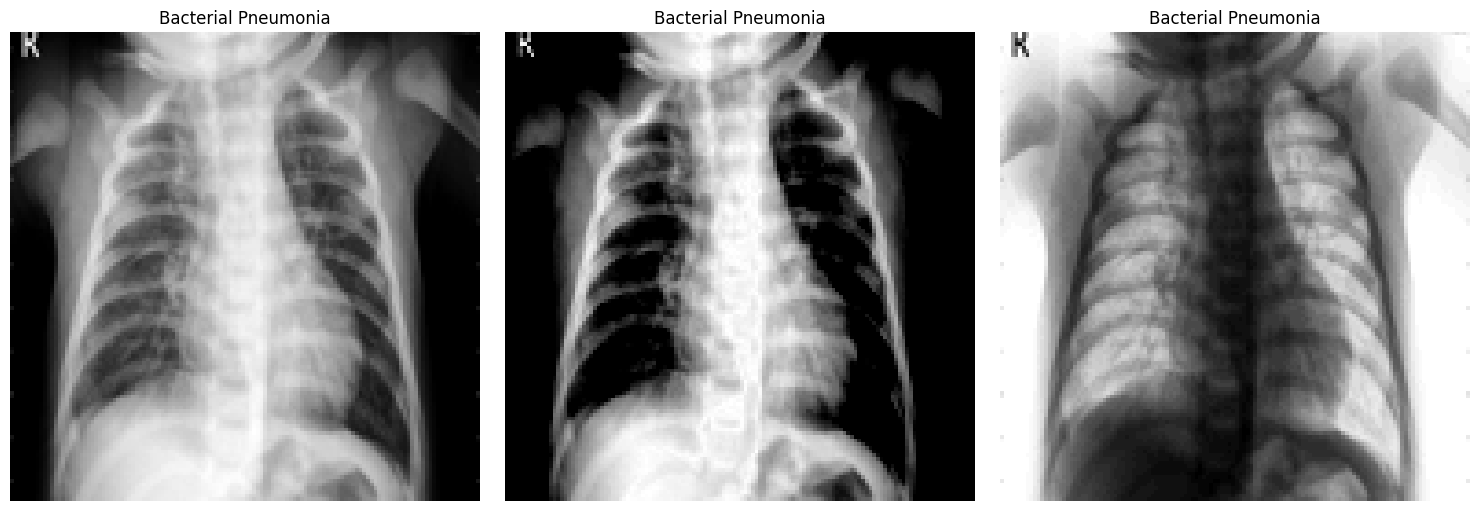

In [20]:
# Generar 1 nº aleatorio
num_image = np.random.randint(0, len(labels1))

# Crea un subplot con 1 fila y 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Itera sobre las 3 imágenes y sus etiquetas que tiene el índice elegido
for i in range(3):
    matriz = np.take(images1[num_image], i, axis=2)
    axes[i].imshow(matriz, cmap=plt.cm.binary)
    axes[i].set_title(class_names[labels1[num_image]])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Liberamos memoria
del num_image
del matriz

Como se puede ver, lo que se ha realizado en la segunda pasada sobre la carpeta .zip donde se encuentran los datos, se han generado dos imágenes más por cada registro en nuestra base de datos. El objetivo de esto ofrecerle a nuestro modelo binario más información esperando que de esta manera consiga aprender a diferenciar de manera más eficaz entre gente sana y enferma, y entre tipos de neumonía.

Esto se utiliza solo en el modelo binario porque aquí sí que ha demostrado mejorar el rendimiento de los modelos. En cambio, cuando se lo introducimos al modelo multiclase, solo lo empeoró.

Para continuar, se muestran también cuatro registros aleatorios juntos:

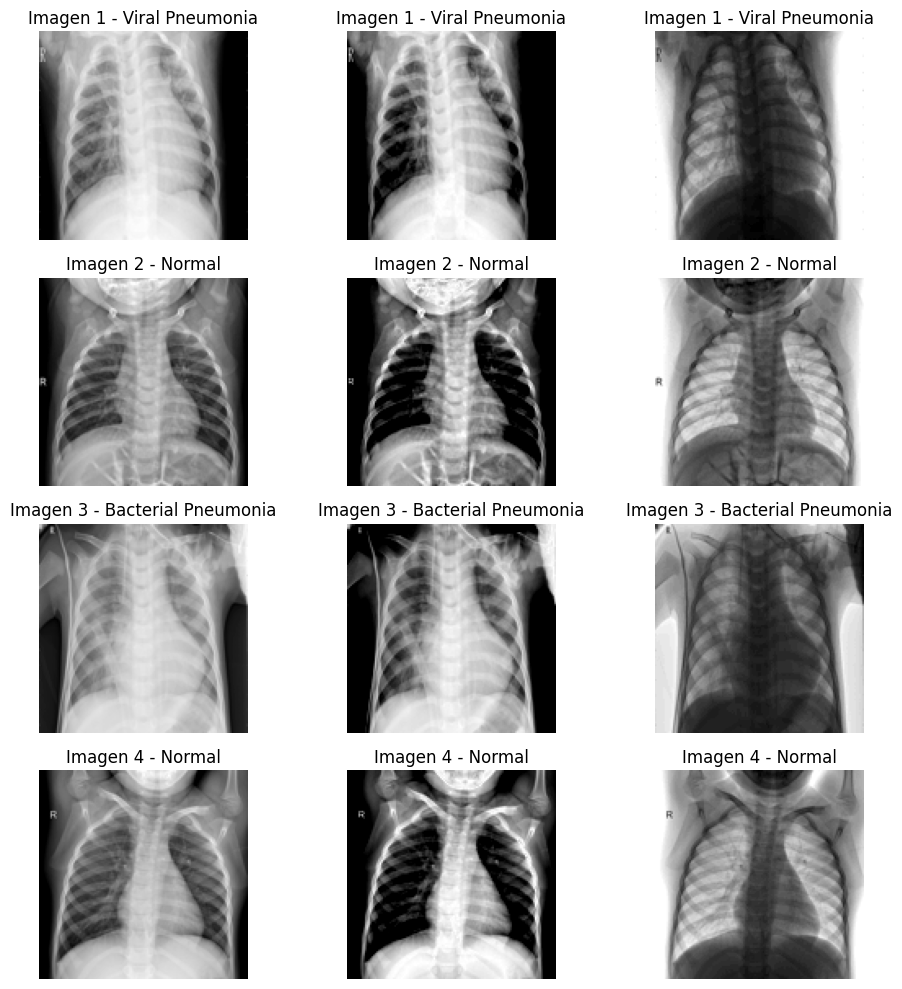

In [21]:
# Generar 4 números aleatorios
num_images = np.random.randint(0, len(images1), 4)

# Crea un subplot con 4 filas y 3 columnas
fig, axes = plt.subplots(4, 3, figsize=(10, 10))

# Itera sobre las primeras 4 imágenes y sus etiquetas
for i in range(4):
  for j in range(3):
        matriz = np.take(images1[num_images[i]], j, axis=2)
        axes[i, j].imshow(matriz, cmap=plt.cm.binary)
        axes[i, j].set_title(f'Imagen {i+1} - {class_names[labels1[num_images[i]]]}')
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

# Liberamos memoria
del num_images
del matriz

### 4.3 Ajuste de conjuntos de datos a los dos modelos binarios planteados

**BORRADPR**

Se observa que los datos de no están balanceados con respecto a sus clases. No obstante, en uno de estos dos modelos se va a actuar de distinta manera.

En el primer modelo (SANO/NO SANO) **NO** se van a balancear las clases, pero para el segundo sí (BACTERIAL / VIRAL PNEUMONIA).

Para el segundo es como se ha hecho siempre en esta asignatura, porque se sabe que esto conlleva sesgos y para evitar estos problemas se aplica directamente el método que equilibra las clases eliminando imágenes.

En cambio, en el primer modelo no se van a balancear. La justificación que hay detras de esta decisión está relacionada con investigación que se ha realizado, ya que en muchos proyectos interesantes no balancean las clases. Por ejemplo el TFM de Raquel Sauras en el Master Universitario Bioinformática y Bioestadística UOC-UB publicado en diciembre de 2021 ([Enlace](https://openaccess.uoc.edu/bitstream/10609/139529/6/rsaurassTFM0122memoria.pdf)).

También, después de investigar sobre el error tipo I y el error tipo II (errores estadísticos). Los errores tipo I y tipo II están relacionados con pruebas de hipótesis en estadística y son conceptos fundamentales en el contexto de la toma de decisiones basada en muestras. Estos están mejor explicados en un apartado más adelante. Básicamente, se va a intentar reducir el error tipo II, que en el contexto de nuestro es reducir los falsos negativos, es decir, reducir el nº de veces que prediga que alguien **no** tiene neumonía, cuando **sí** la tiene. Esto es porque hemos llegado a la conclusión de que es mejor tratar a alguien que no tiene neumonía, que no tratar a alguien que sí la tiene (**En el caso de el CÁNCER esto NO sería una buena estrategia, porque tratar con quimioterapia a alguien que no lo necesita NO ES ALGO BUENO**).

Además, entendiendo el contexto de donde pueden estar sacados estos datos, nos hemos dado cuenta de que en el contexto de un hospital, va a haber mucha más disponibilidad de imágenes de gente enferma, que de gente que no esté enferma, por eso el modelo tiene que funcionar muy bien con los datos de los que más va a disponer.

En este caso, no es tan fácil como subdivir y normalizar los datos. Lo que se ha planteado son dos modelos. El primero de ellos es uno que prediga si un paciente está sano o enfermo, es decir, se necesita reestructurar la base de datos al completo, ya que hay que construir una nueva que guarde todos las imágenes de la clase 0 ('Normal') como la clase 0 (sano) **(1)**, y todas las imágenes de las clase 1 y 2 (los dos tipos de neumonía) como la clase 1 (enfermo).

                | Clase                   | Codificación|
                |-------------------------|-------------|
                | Normal (SANO)           | 0           |
                | Pneumonia (ENFERMO)     | 1           |

Con el segundo modelo se hará algo parecido un poco más adelante. Cabe destacar que esto se está realizando antes del equilibrado y la normalización de los datos ya que estos modelos tienen distintas consideraciones en cuanto al balanceo de las clases (las cuales se explican más adelante) y porque, como se va a usar la función de perdida 'binary_crossentropy', no es necesario que los datos estén en formato 'one-hot encoding'.

Así, esto que se ha explicado para el primer modelo se consigue con el siguiente código:

In [22]:
# Obtén los índices de las imágenes que tienen etiqueta 0
idx_0 = np.where(labels1[:] == 0)[0]

# Obtén los índices de las imágenes que tienen etiqueta 1 o 2
idx_combine_1_2 = np.where(np.logical_or(labels1[:] == 1, labels1[:] == 2))[0]

# Seleccionar todas las imágenes en test_X
images1_1 = images1.copy()

# Asignar la etiqueta 0 a todas las imágenes inicialmente
labels1_1 = np.zeros_like(labels1[:])

# Actualizar las etiquetas correspondientes a la clase 0
labels1_1[idx_0] = 0

# Actualizar las etiquetas correspondientes a la clase 1 y 2 combinadas
labels1_1[idx_combine_1_2] = 1

# Muestra el resultado
print("Etiquetas originales:")
print(labels1)
print(labels1.shape)
print("\nEtiquetas modificadas:")
print(labels1_1)
print(labels1_1.shape)

# Liberamos memoria
del idx_0
del idx_combine_1_2

Etiquetas originales:
[1 1 1 ... 2 2 2]
(5840,)

Etiquetas modificadas:
[1 1 1 ... 1 1 1]
(5840,)


Para continuar, también hay que construir una base de datos para el segundo modelo, que predecirá entre las siguientes clases:

                | Clase                   | Codificación|
                |-------------------------|-------------|
                | Bacterial Pneumonia     | 0           |
                | Viral Pneumonia         | 1           |

Para ello, se utiliza el siguiente código:

In [23]:
# Obtén los índices de las imágenes que tienen etiqueta 1 o 2
idx_combine_1_2 = np.where(np.logical_or(labels1[:] == 1, labels1[:] == 2))[0]

# Seleccionar todas las imágenes en test_X que tienen etiqueta 1 o 2
images1_2 = images1[idx_combine_1_2].copy()

# Asignar las etiquetas correspondientes a las clases 1 y 2
labels1_2 = labels1[idx_combine_1_2]

# Obtén los índices de las imágenes que tienen etiqueta 1 (BACTERIANA)
idx_0 = np.where(labels1_2[:] == 1)[0]

# Obtén los índices de las imágenes que tienen etiqueta 2 (VÍRICA)
idx_1 = np.where(labels1_2[:] == 2)[0]

# Actualizar las etiquetas correspondientes a la clase 0
labels1_2[idx_0] = 0

# Actualizar las etiquetas correspondientes a la clase 1
labels1_2[idx_1] = 1

# Muestra el resultado
print("Etiquetas originales:")
print(labels1)
print(labels1.shape)
print("\nEtiquetas modificadas:")
print(labels1_2)
print(labels1_2.shape)

# Liberamos memoria
# Liberamos memoria
del idx_0
del idx_1
del idx_combine_1_2

Etiquetas originales:
[1 1 1 ... 2 2 2]
(5840,)

Etiquetas modificadas:
[0 0 0 ... 1 1 1]
(4265,)


### 4.4 Equilibrado de imágenes

Algo muy importante es comprobar que nuestras clases estén equilibradas:

In [24]:
# DATOS PARA EL PRIMER MODELO
index_count = Counter(labels1_1)
sorted_indices = sorted(index_count.items())
for index, count in sorted_indices:
    print(f'{class_names_1[index]}: {count}')

# Liberamos memoria
del index_count
del sorted_indices

Normal: 1575
Pneumonia: 4265


In [25]:
# DATOS PARA EL SEGUNDO MODELO
index_count = Counter(labels1_2)
sorted_indices = sorted(index_count.items())
for index, count in sorted_indices:
    print(f'{class_names_2[index]}: {count}')

# Liberamos memoria
del index_count
del sorted_indices

Bacterial Pneumonia: 2772
Viral Pneumonia: 1493


Se observa que los datos de no están balanceados con respecto a sus clases. No obstante, en uno de estos dos modelos se va a actuar de distinta manera.

En el primer modelo (SANO/NO SANO) **NO** se van a balancear las clases, pero para el segundo sí (BACTERIAL / VIRAL PNEUMONIA).

Para el segundo es como se ha hecho siempre en esta asignatura, porque se sabe que esto conlleva sesgos y para evitar estos problemas se aplica directamente el método que equilibra las clases eliminando imágenes.

En cambio, en el primer modelo no se van a balancear. La justificación que hay detras de esta decisión está relacionada con investigación que se ha realizado, ya que en muchos proyectos interesantes ([como este](https://openaccess.uoc.edu/bitstream/10609/139529/6/rsaurassTFM0122memoria.pdf)) no balancean las clases.

También, después de investigar sobre el error tipo I y el error tipo II (errores estadísticos). Los errores tipo I y tipo II están relacionados con pruebas de hipótesis en estadística y son conceptos fundamentales en el contexto de la toma de decisiones basada en muestras. Estos están mejor explicados en un apartado más adelante. Básicamente, se va a intentar reducir el error tipo II, que en el contexto de nuestro es reducir los falsos negativos, es decir, reducir el nº de veces que prediga que alguien **no** tiene neumonía, cuando **sí** la tiene. Esto es porque hemos llegado a la conclusión de que es mejor tratar a alguien que no tiene neumonía, que no tratar a alguien que sí la tiene (**En el caso de el CÁNCER esto NO sería una buena estrategia, porque tratar con quimioterapia a alguien que no lo necesita NO ES ALGO BUENO**).

Además, entendiendo el contexto de donde pueden estar sacados estos datos, nos hemos dado cuenta de que en el contexto de un hospital, va a haber mucha más disponibilidad de imágenes de gente enferma, que de gente que no esté enferma, por eso el modelo tiene que funcionar muy bien con los datos de los que más va a disponer.

Dicho todo esto, se balancean las clases de la base de datos para el segundo modelo:

In [28]:
# Número de instancias que se quiere por clase
num_instancias = 1570 #Aquí se pone el nº que se decida

# Se crean listas vacías para las nuevas imágenes y etiquetas
new_images1 = []
new_labels1 = []

# Iterar sobre cada clase
for i in range(len(np.unique(images1_1))):
    # Se obtiene el nº de índices de la clase actual
    indices = np.where(labels1_1 == i)[0]
    # Si la clase tiene más instancias que num_instancias, se reduce
    if len(indices) > num_instancias:
        indices = np.random.choice(indices, num_instancias, replace=False)
    # Añadir las instancias seleccionadas a las nuevas listas
    new_images1.extend(images1_1[indices])
    new_labels1.extend(labels1_1[indices])

# Se convierten las listas a arrays de NumPy
new_images1 = np.array(new_images1)
new_labels1 = np.array(new_labels1)

# Se comprueba que las clases están equilibradas
index_count = Counter(new_labels1)
sorted_indices = sorted(index_count.items())
for index, count in sorted_indices:
    print(f'{class_names_1[index]}: {count}')

# Liberamos memoria
del index_count
del sorted_indices
del num_instancias
del indices

Normal: 1570
Pneumonia: 1570


In [29]:
# Número de instancias que se quiere por clase
num_instancias = 1490 #Aquí se pone el nº que se decida

# Se crean listas vacías para las nuevas imágenes y etiquetas
new_images2 = []
new_labels2 = []

# Iterar sobre cada clase
for i in range(len(np.unique(images1_2))):
    # Se obtiene el nº de índices de la clase actual
    indices = np.where(labels1_2 == i)[0]
    # Si la clase tiene más instancias que num_instancias, se reduce
    if len(indices) > num_instancias:
        indices = np.random.choice(indices, num_instancias, replace=False)
    # Añadir las instancias seleccionadas a las nuevas listas
    new_images2.extend(images1_2[indices])
    new_labels2.extend(labels1_2[indices])

# Se convierten las listas a arrays de NumPy
new_images2 = np.array(new_images2)
new_labels2 = np.array(new_labels2)

# Se comprueba que las clases están equilibradas
index_count = Counter(new_labels2)
sorted_indices = sorted(index_count.items())
for index, count in sorted_indices:
    print(f'{class_names_2[index]}: {count}')

# Liberamos memoria
del index_count
del sorted_indices
del num_instancias
del indices

Bacterial Pneumonia: 1490
Viral Pneumonia: 1490


### 4.5 Preparar y normalizar datos

Para terminar con el procesado, se subdividen los datos:

In [30]:
# DATOS DEL PRIMER MODELO
# Primero, divide los datos en conjuntos de entrenamiento y temporal (que luego se dividirá en validación y prueba)
X_1, test_X_1, y_1, test_y_1 = train_test_split(new_images1, new_labels1,
                                        test_size=0.2,
                                        random_state=89,
                                        shuffle=True,
                                        stratify=new_labels1)

# Luego, divide los datos temporales en conjuntos de validación y prueba
train_X_1, val_X_1, train_y_1, val_y_1 = train_test_split(X_1, y_1,
                                                  test_size=0.2,
                                                  random_state=89,
                                                  shuffle=True,
                                                  stratify=y_1)
# Se normalizan los datos:
train_X_1 = train_X_1.astype('float32')/255
val_X_1 = val_X_1.astype('float32')/255
test_X_1 = test_X_1.astype('float32')/255

print("TRAIN:", train_X_1.shape)
print("TEST:", test_X_1.shape)
print("VAL:", val_X_1.shape)

# Liberamos memoria
# del images1
# del labels1

TRAIN: (2009, 128, 128, 3)
TEST: (628, 128, 128, 3)
VAL: (503, 128, 128, 3)


In [31]:
# DATOS DEL SEGUNDO MODELO
# Primero, divide los datos en conjuntos de entrenamiento y temporal (que luego se dividirá en validación y prueba)
X_2, test_X_2, y_2, test_y_2 = train_test_split(new_images1, new_labels1,
                                        test_size=0.2,
                                        random_state=89,
                                        shuffle=True,
                                        stratify=new_labels1)

# Luego, divide los datos temporales en conjuntos de validación y prueba
train_X_2, val_X_2, train_y_2, val_y_2 = train_test_split(X_2, y_2,
                                                  test_size=0.2,
                                                  random_state=89,
                                                  shuffle=True,
                                                  stratify=y_2)

# Se normalizan los datos:
train_X_2 = train_X_2.astype('float32')/255
val_X_2 = val_X_2.astype('float32')/255
test_X_2 = test_X_2.astype('float32')/255

print("TRAIN:", train_X_2.shape)
print("TEST:", test_X_2.shape)
print("VAL:", val_X_2.shape)

TRAIN: (2009, 128, 128, 3)
TEST: (628, 128, 128, 3)
VAL: (503, 128, 128, 3)


Y se comprueba el balanceo de las clases tras la división en cada uno de los subconjuntos:

In [32]:
index_count = Counter(train_y_2)
print("-> TRAIN:")
sorted_indices = sorted(index_count.items())
for index, count in sorted_indices:
    print(f'{class_names_2[index]}: {count}')

del index_count
del sorted_indices

-> TRAIN:
Bacterial Pneumonia: 1005
Viral Pneumonia: 1004


In [33]:
index_count = Counter(val_y_2)
print("-> VAL:")
sorted_indices = sorted(index_count.items())
for index, count in sorted_indices:
    print(f'{class_names_2[index]}: {count}')

del index_count
del sorted_indices

-> VAL:
Bacterial Pneumonia: 251
Viral Pneumonia: 252


In [34]:
index_count = Counter(test_y_2)
print("-> TEST:")
sorted_indices = sorted(index_count.items())
for index, count in sorted_indices:
    print(f'{class_names_2[index]}: {count}')

del index_count
del sorted_indices

-> TEST:
Bacterial Pneumonia: 314
Viral Pneumonia: 314


# 5.0 MODELO

Una vez estan todos los datos ya correctamente guardados y listos para poder utilizar en un modelo de redes convolucionales comenzamos a definir este modelo. Para llevar a cabo esta tarea se ha seguido la siguiente estructura:

- Definir el protocolo de evaluación
- Desarrollar un modelo simple
- Aplicar ingeniería de características
  - Tamaño imagen
  - Utilizar data aumentation
  - Añadir imagen con más brillo y contraste
  - Definir el paradigma de actuación:
    1. Modelo multiclase
    2. Dos modelos binarios
- Definir la arquitectura y algunos hiperparámetros
- Añadir regularizadores
- Explicar y entrenar el modelo final

## 5.1. PROTOCOLO DE EVALUACIÓN

Para poder medir el progreso de las distintas pruebas vamos a utilizar las imagenes de validación.

En este caso se planteo inicialmemte hacer validación cruzada de K iteraciones, pero tras contastar los resultados y comprobar que asemejaba mucho por el exceseo de recursos consumidos se consideró que no valia la pena. Por eso se decidió utilizar el conjunto de validación hold-out.

## 5.2 UN MODELO SIMPLE

Se comienza con un modelo sencillo de redes neuronales convolucionales, y a partir de este iremos construyendo nuestro modelo final. Para ello, utilizamos la siguiente arquitectura:

In [35]:
gc.collect()#LIMPIA BASURA
# del model

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

Se puede observar que es un modelo simple, con solo 213796 parámetros entrenables.

Epoch 1/20
6/6 [==============================] - 15s 1s/step - loss: 1.1789 - accuracy: 0.3566 - val_loss: 1.0934 - val_accuracy: 0.3589
Epoch 2/20
6/6 [==============================] - 1s 190ms/step - loss: 1.0946 - accuracy: 0.3556 - val_loss: 1.0806 - val_accuracy: 0.3408
Epoch 3/20
6/6 [==============================] - 1s 200ms/step - loss: 1.0609 - accuracy: 0.4283 - val_loss: 1.0610 - val_accuracy: 0.5559
Epoch 4/20
6/6 [==============================] - 1s 199ms/step - loss: 1.0529 - accuracy: 0.4500 - val_loss: 0.9497 - val_accuracy: 0.6494
Epoch 5/20
6/6 [==============================] - 1s 194ms/step - loss: 1.0430 - accuracy: 0.5500 - val_loss: 0.9787 - val_accuracy: 0.3966
Epoch 6/20
6/6 [==============================] - 1s 214ms/step - loss: 1.0083 - accuracy: 0.5462 - val_loss: 0.8229 - val_accuracy: 0.6885
Epoch 7/20
6/6 [==============================] - 1s 208ms/step - loss: 1.0145 - accuracy: 0.5458 - val_loss: 0.8676 - val_accuracy: 0.5964
Epoch 8/20
6/6 [======

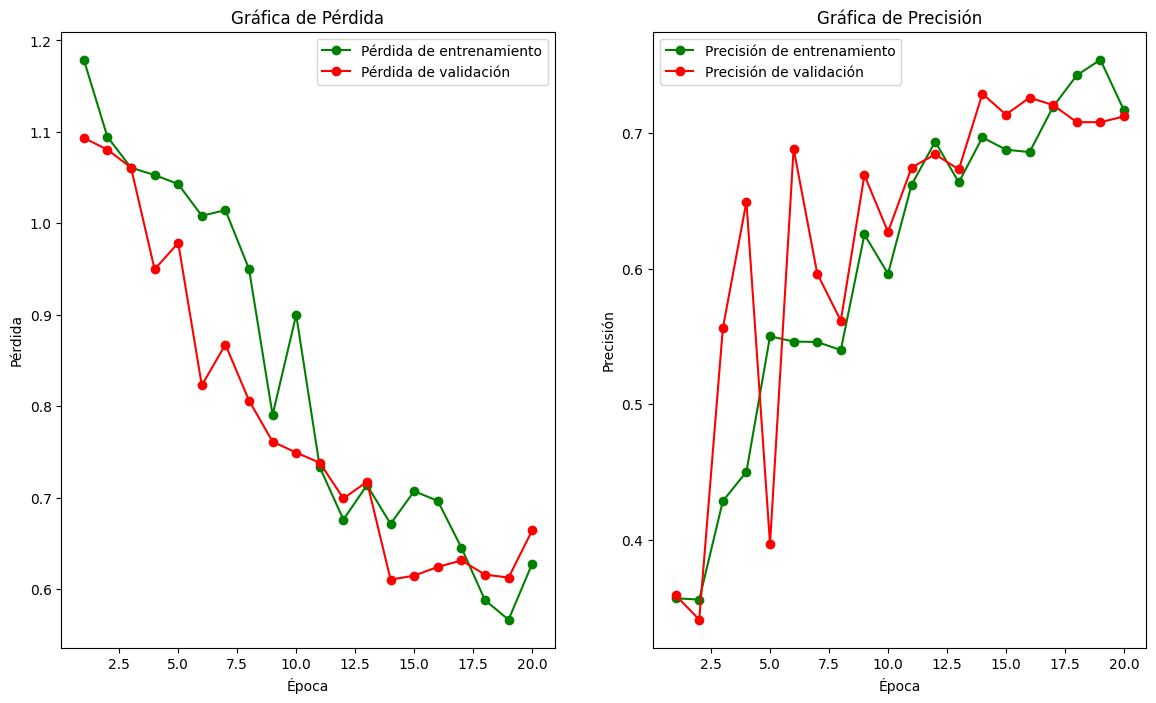

In [36]:
# Compila el modelo
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Entrena el modelo
history = model.fit(train_X, train_y, batch_size=512, epochs=20, verbose=True, validation_data=(val_X, val_y))

train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

print('\n RENDIMIENTO ENTRENAMIENTO:')
evaluar_rendimiento_validacion(train_loss,train_acc, val_loss, val_acc)

In [37]:
# Evalúa el modelo
test_loss, test_acc = model.evaluate(test_X, test_y_categorical, verbose=0)

print('Test accuracy:', test_acc)

Test accuracy: 0.7248322367668152


Lo que se puede concluir de nuestro modelo simple es que, efectivamente tiene mucho margen de mejora, teniendo solo un (más o menos) 65% de precisión en el test. No obstante, cabe destacar que al menos, ya es mejor que el peor modelo posible, que sería elegir al azar un número del 1 al 3 y que esa fuese nuestra predicción, lo cuál tendría una probabilidad de acierto de 0.33.

## 5.3 INGENIERÍA DE CARACTERÍSTICAS

### TAMAÑO DE LA IMAGEN

SE HAN PROBADO 64X64, 128X128, 256X256, 512X512

LA SEGUNDA ES LA MEJOR, LA TERCERA Y LA PRIMERA TENIAN PRECISOONES MAS BAJAS Y LA CUARTA NO TENIA RAM SUFICIENTE

### DATA AUMENTATION

ESTOS CAMBIOS TIENEN UN SENTIDO, EXPLICAR PORQUE

In [38]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(train_X)

### CONTRASTES DE IMAGEN

AQUI LA IDEA ES METERLE AL MODELO TRES INPUTS, COMO CUANDO LE METIAMOS LOS TRES COLORES, LA IDEA ES QUE SEAN LA IAMEGN CON ALTO CONTRASTE, CON BAJO CONTRASTE Y LA IMAGEN ORIGINAL, TAMBIEN SE PODRIA PROBAR CON EL BRILLO O OTRAS COSAS.

AL METERLE MAS INPUTS AL MODELO APRENDE MÁS, ESA ES LA IDEA, HAY QUE VER COMO SE HACE ESTO

Para alimentar a tu modelo con múltiples entradas, puedes utilizar la API funcional de Keras para definir un modelo con múltiples entradas. Aquí te muestro cómo puedes hacerlo:

```python
from keras.models import Model
from keras.layers import Input, Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate

# Definir dos entradas
inputA = Input(shape=(128, 128, 1))  # Imagen con contraste alto
inputB = Input(shape=(128, 128, 1))  # Imagen con contraste bajo

# Primer ramo de la red neuronal (para la imagen con contraste alto)
x = Conv2D(32, (3, 3), activation='relu')(inputA)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Model(inputs=inputA, outputs=x)

# Segundo ramo de la red neuronal (para la imagen con contraste bajo)
y = Conv2D(32, (3, 3), activation='relu')(inputB)
y = MaxPooling2D(pool_size=(2, 2))(y)
y = Flatten()(y)
y = Model(inputs=inputB, outputs=y)

# Combinar las salidas de los dos ramos
combined = concatenate([x.output, y.output])

# Aplicar una capa densa final
z = Dense(2, activation="softmax")(combined)

# Crear el modelo que aceptará las imágenes con contraste alto y bajo en sus respectivas entradas
model = Model(inputs=[x.input, y.input], outputs=z)
```

Este código define un modelo con dos ramas separadas, una para las imágenes con contraste alto y otra para las imágenes con contraste bajo. Cada rama consiste en una capa convolucional seguida de una capa de pooling y una capa de aplanamiento. Las salidas de las dos ramas se combinan y se alimentan a una capa densa final que produce la salida del modelo.

Por favor, ten en cuenta que este es solo un ejemplo y puede que necesites ajustar la arquitectura del modelo según tus necesidades. Si tienes alguna otra pregunta, no dudes en hacerla.

### TIPOS DE MODELOS

#### MODELO DE CLASIFICACIÓN MULTICLASE

EN PRINICIPIO NOS CENTRAMOS EN ESTE QUE HA ACABADO DANDO BUENOS RESULTADOS

IMPORTANTE VER LA RELACION ENTRE LAS CLASES

PONER LA MATRIZ DE CONFUSION PARA VERLO

#### DOS MODELOS DE CLASIFICACIÓN BINARIA

##### MODELO 1 - SANO/NO SANO

Antes de nada, se definen los generadores que se van a utilizar durante el entrenamiento:

In [39]:
datagentrain1 = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagentrain1.fit(train_X_1)

Después de unas pruebas, se ha decidido que esta sea la forma que tenga nuestro modelo binario 1:

In [40]:
model_1 = Sequential()
model_1.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (128,128,3)))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_1.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model_1.add(Dropout(0.1))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_1.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_1.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model_1.add(Dropout(0.1))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_1.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model_1.add(Dropout(0.1))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_1.add(Conv2D(512 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model_1.add(Dropout(0.1))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_1.add(Flatten())
model_1.add(Dense(units = 1024 , activation = 'relu'))
model_1.add(Dropout(0.1))
model_1.add(Dense(units = 512 , activation = 'relu'))
model_1.add(Dropout(0.1))
model_1.add(Dense(units = 512 , activation = 'relu'))
model_1.add(Dropout(0.1))
model_1.add(Dense(units = 1 , activation = 'sigmoid'))

# Compila el modelo
model_1.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Así, lo entrenamos 60 épocas con el objetivo de encontrar la época óptima:

Epoch 1/60
63/63 [==============================] - 18s 175ms/step - loss: 1.1761 - accuracy: 0.7546 - val_loss: 1.9628 - val_accuracy: 0.5010 - lr: 0.0010
Epoch 2/60
63/63 [==============================] - 10s 163ms/step - loss: 0.3690 - accuracy: 0.8631 - val_loss: 5.7707 - val_accuracy: 0.5010 - lr: 0.0010
Epoch 3/60
63/63 [==============================] - 8s 130ms/step - loss: 0.3259 - accuracy: 0.8711 - val_loss: 8.3979 - val_accuracy: 0.5010 - lr: 0.0010
Epoch 4/60
63/63 [==============================] - 10s 164ms/step - loss: 0.2793 - accuracy: 0.9034 - val_loss: 0.9522 - val_accuracy: 0.5050 - lr: 0.0010
Epoch 5/60
63/63 [==============================] - 10s 162ms/step - loss: 0.2607 - accuracy: 0.9109 - val_loss: 3.9227 - val_accuracy: 0.5030 - lr: 0.0010
Epoch 6/60
63/63 [==============================] - 8s 131ms/step - loss: 0.2348 - accuracy: 0.9169 - val_loss: 2.2531 - val_accuracy: 0.5388 - lr: 0.0010
Epoch 7/60
63/63 [==============================] - 10s 167ms/step

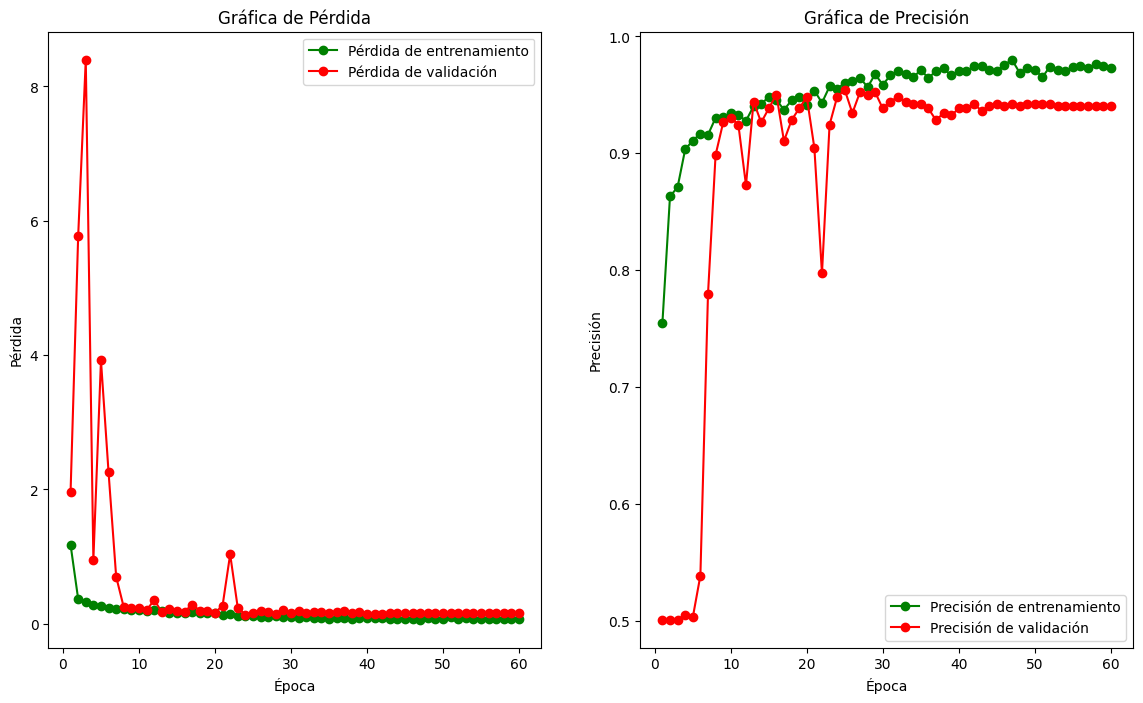

In [41]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience = 6,
                                            verbose=1,
                                            factor=0.3,
                                            min_lr=0.00000001)

history = model_1.fit(datagentrain1.flow(train_X_1,train_y_1, batch_size = 32),
                    epochs = 60 , validation_data = (val_X_1,val_y_1),
                    callbacks = [learning_rate_reduction])

train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

print('\n RENDIMIENTO ENTRENAMIENTO:')
evaluar_rendimiento_validacion(train_loss,train_acc, val_loss, val_acc)

In [42]:
test_loss, test_acc = model_1.evaluate(test_X_1, test_y_1, verbose=0)

print('Test accuracy:', test_acc)

Test accuracy: 0.9490445852279663


20/20 [==============================] - 0s 7ms/step


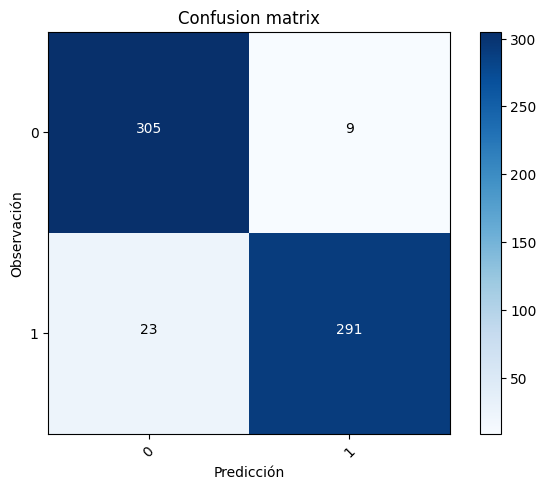

<Figure size 640x480 with 0 Axes>

In [43]:
predictions = model_1.predict(test_X_1)

# Convertir las predicciones a etiquetas enteras
predictions_binary = np.round(predictions).astype(int)

# Computar la matriz de confusión
confusion_mtx = confusion_matrix(test_y_1, predictions_binary)

plot_confusion_matrix(confusion_mtx, classes = range(2))

##### MODELO 2 - TIPOS DE NEUMONÍA

Antes de nada, se definen los generadores que se van a utilizar durante el entrenamiento:

In [44]:
datagentrain2 = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagentrain2.fit(train_X_2)

Después de unas pruebas, se ha decidido que esta sea la forma que tenga nuestro modelo binario 2:

In [45]:
model_2 = Sequential()
model_2.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (128,128,3)))
model_2.add(BatchNormalization())
model_2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_2.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model_2.add(Dropout(0.1))
model_2.add(BatchNormalization())
model_2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_2.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_2.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model_2.add(Dropout(0.1))
model_2.add(BatchNormalization())
model_2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_2.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model_2.add(Dropout(0.1))
model_2.add(BatchNormalization())
model_2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_2.add(Conv2D(512 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model_2.add(Dropout(0.1))
model_2.add(BatchNormalization())
model_2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_2.add(Flatten())
model_2.add(Dense(units = 2048 , activation = 'relu'))
model_2.add(Dropout(0.1))
model_2.add(Dense(units = 1024 , activation = 'relu'))
model_2.add(Dropout(0.1))
model_2.add(Dense(units = 1024 , activation = 'relu'))
model_2.add(Dropout(0.1))
model_2.add(Dense(units = 1 , activation = 'sigmoid'))

# Compila el modelo
model_2.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Así, lo entrenamos 20 épocas y observamos su rendimiento:

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience = 6,
                                            verbose=1,
                                            factor=0.3,
                                            min_lr=0.00000001)

history = model_2.fit(datagentrain2.flow(train_X_2,train_y_2, batch_size = 8),
                    epochs = 60 , validation_data = (val_X_2,val_y_2),
                    callbacks = [learning_rate_reduction])

train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

print('\n RENDIMIENTO ENTRENAMIENTO:')
evaluar_rendimiento_validacion(train_loss,train_acc, val_loss, val_acc)

Epoch 1/60
252/252 [==============================] - 16s 49ms/step - loss: 1.0717 - accuracy: 0.7626 - val_loss: 7.7908 - val_accuracy: 0.5010 - lr: 0.0010
Epoch 2/60
252/252 [==============================] - 11s 45ms/step - loss: 0.4261 - accuracy: 0.8452 - val_loss: 0.4536 - val_accuracy: 0.8390 - lr: 0.0010
Epoch 3/60
252/252 [==============================] - 10s 41ms/step - loss: 0.3886 - accuracy: 0.8621 - val_loss: 0.3908 - val_accuracy: 0.8728 - lr: 0.0010
Epoch 4/60
252/252 [==============================] - 12s 47ms/step - loss: 0.3445 - accuracy: 0.8761 - val_loss: 0.2632 - val_accuracy: 0.9046 - lr: 0.0010
Epoch 5/60
252/252 [==============================] - 11s 43ms/step - loss: 0.3326 - accuracy: 0.8845 - val_loss: 0.2711 - val_accuracy: 0.9304 - lr: 0.0010
Epoch 6/60
252/252 [==============================] - 12s 46ms/step - loss: 0.3034 - accuracy: 0.8915 - val_loss: 0.2257 - val_accuracy: 0.9304 - lr: 0.0010
Epoch 7/60
252/252 [==============================] - 11s 

##### RESULTADOS DE LOS MODELOS

In [ ]:
test_loss, test_acc = model_2.evaluate(test_X_2, test_y_2, verbose=0)

print('Test accuracy:', test_acc)

In [ ]:
predictions = model_2.predict(test_X_2)

# Convertir las predicciones a etiquetas enteras
predictions_binary = np.round(predictions).astype(int)

# Computar la matriz de confusión
confusion_mtx = confusion_matrix(test_y_2, predictions_binary)

plot_confusion_matrix(confusion_mtx, classes = range(2))

## 5.4 HIPERPARAMETROS Y ARQUITECTURAS

A continucación se definen las pruebas que se van a realizar para encontrar la aruitectura del modelo que mejor se adapta a las necesidades del problema. Se van a probar tres arquitecturas distintas de tamaños distintos para ver cual es la que tiene el número de parametros necesarios para que no haya sobrentrenamiento pero si se puede resolver el problema.


```
| Modelo | Capas Conv2D              | Capas MaxPool2D | Capas Dense         |
|--------|---------------------------|-----------------|---------------------|
| 1      | 32, 64, 64, 128, 256, 512 | 6               | 1024, 1024, 1024, 3 |
| 2      | 32, 64, 64, 128, 256, 256 | 6               | 4096, 2048, 1024, 3 |
| 3      | 64, 128, 256, 512, 512    | 5               | 8192, 4096, 4096, 3 |
```

Además, para encontrar los hiperparametros, número de épocas y batch size, adecuados para el problema se han hecho las siguientes pruebas:

```
| Batch Size | Épocas |
|------------|--------|
| 8          | 60     |
| 16         | 40     |
| 32         | 20     |
```

Es importante tambien destacar que para este problema el padding es importante que sea 'same' para que las dimensiones de la imagen no se reduzcan ya que toda la imagen es importante para identificar la clasificación en este problema.

Empezamos estudiando la primera arquitectura, que es la más sencilla de las tres:

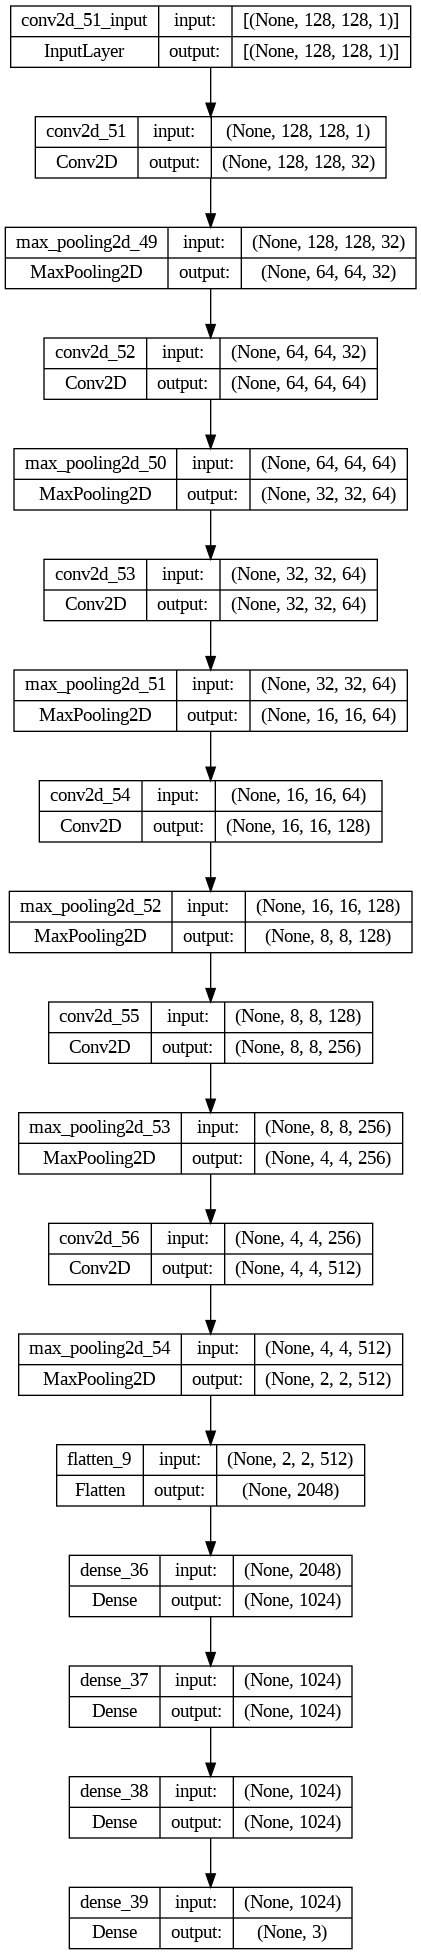

In [ ]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (128,128,1)))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(512 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 1024 , activation = 'relu'))
model.add(Dense(units = 1024 , activation = 'relu'))
model.add(Dense(units = 1024 , activation = 'relu'))
model.add(Dense(units = 3 , activation = 'softmax'))

# Para visualizar la estructura del modelo
keras.utils.plot_model(model, "my_first_model.png", show_shapes=True)

In [ ]:
# Para visualizar la estructura y los parametros del modelo
model.summary()

# Para obtener el número total de parámetros en tu modelo
params = model.count_params()
print(f'\n\nEl número total de parámetros en tu modelo es: {params}')

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_52 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_50 (MaxPooli  (None, 32, 32, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_53 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_51 (MaxPooli  (None, 16, 16, 64)       

Tras realizar diversas pruebas con esta aqruitectura los resultados han sido positivos y se ha logrado alcanzar una precisión del 75%, pero esta primera arquitectura es la más sencilla de las tres teniendo solo 5.805.379 parametros entrenables.

Pasamos a la segunda arquitectura, que cuenta con más capas densas y menos convolucionales:

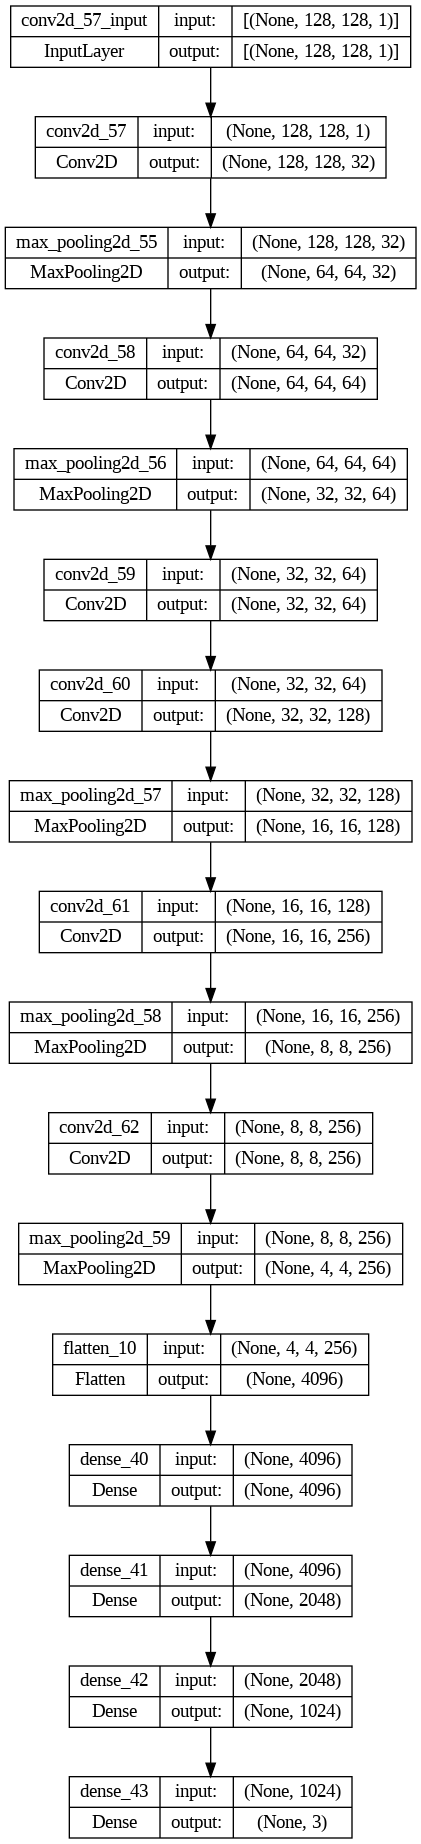

In [ ]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (128,128,1)))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 4096 , activation = 'relu'))
model.add(Dense(units = 2048 , activation = 'relu'))
model.add(Dense(units = 1024 , activation = 'relu'))
model.add(Dense(units = 3 , activation = 'softmax'))

# Para visualizar la estructura del modelo
keras.utils.plot_model(model, "my_first_model.png", show_shapes=True)

In [ ]:
# Para visualizar la estructura y los parametros del modelo
model.summary()

# Para obtener el número total de parámetros en tu modelo
params = model.count_params()
print(f'\n\nEl número total de parámetros en tu modelo es: {params}')

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d_55 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_58 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_56 (MaxPooli  (None, 32, 32, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_59 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 conv2d_60 (Conv2D)          (None, 32, 32, 128)     

En las pruebas realizadas con esta arquitectura los resultados fueron muy favorables y se logró subir un 10% de precisión en los datos de validación. Además todavía no parece haber sobreentranemiento. Por lo que el el número de parametros entrenables para resolver mejor el problema, de momento, han sido 28.288.067 en total.

La tercera arquitectura, que es la más compleja de las tres:

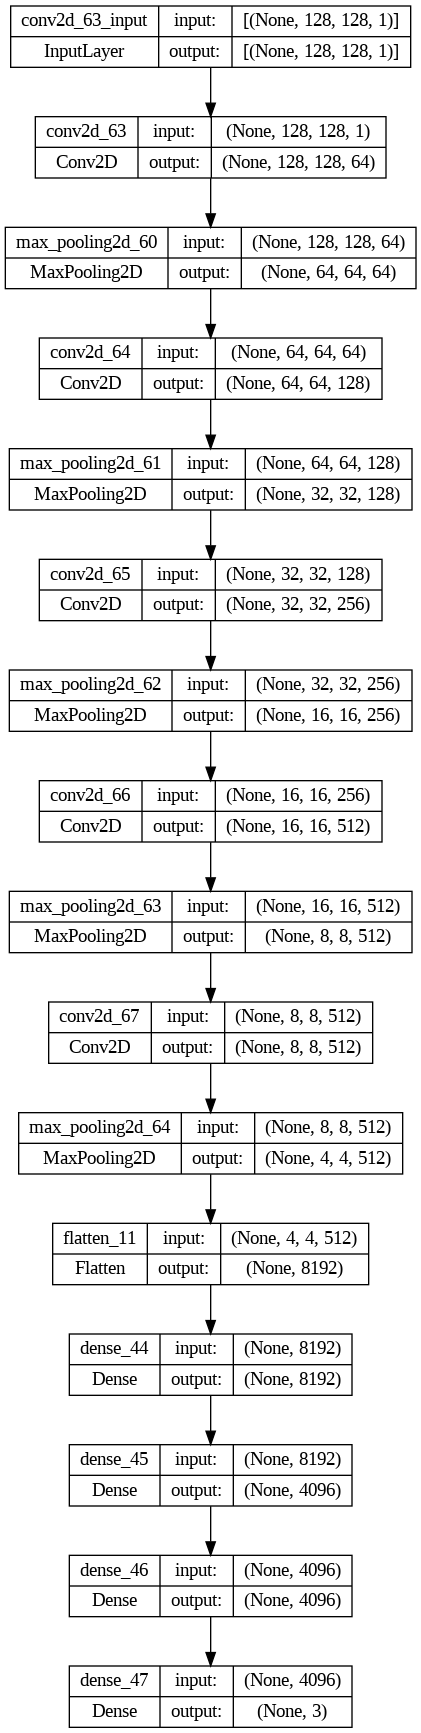

In [ ]:
model = Sequential()
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (128,128,1)))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(512 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(512 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 8192 , activation = 'relu'))
model.add(Dense(units = 4096 , activation = 'relu'))
model.add(Dense(units = 4096 , activation = 'relu'))
model.add(Dense(units = 3 , activation = 'softmax'))

# Para visualizar la estructura del modelo
keras.utils.plot_model(model, "my_first_model.png", show_shapes=True)

In [ ]:
# Para visualizar la estructura y los parametros del modelo
model.summary()

# Para obtener el número total de parámetros en tu modelo
params = model.count_params()
print(f'\n\nEl número total de parámetros en tu modelo es: {params}')

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 128, 128, 64)      640       
                                                                 
 max_pooling2d_60 (MaxPooli  (None, 64, 64, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_64 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_61 (MaxPooli  (None, 32, 32, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_65 (Conv2D)          (None, 32, 32, 256)       295168    
                                                                 
 max_pooling2d_62 (MaxPooli  (None, 16, 16, 256)     

Tras hacer las pruebas con esta arquitectura ela precisión no subió. Se empezo a marcar mucho la diferencia entre los datos de entrenamiento y los de validación logrando ver que sobrentrena de forma excesiva perjudicando incluso a la precisión a partir de cierta época.

De cara a elegir los hiperparametros tambien se hicieron numerosas pruebas. Incialmente daba mejores resultados utilizar un batch size de 32 con 20 épocas, porque evitaba el overfitting y logaraba la misma practicamente la misma precisión consumiendo menos recursos. Tras añadir los regularizadores esto cambio, como se relentizaba el sobrentrenamiento al utilizar un batch size de 8 y 60 épocas se lograba aumentar la precisión y no sobrentrenaba gracias al uso de los regularizdores que evitaban que el modelo pudiera adaptar demasiado los parametros a las imagenes de entrenamiento, generalizando más.

## 5.6 REGULARIZADORES

En este apartado se va a tratar de reducir el sobrentrenamiento con el uso de regularizadores. Los que se han probado son:

- Batch Normalization
- Drop Out
- Modificar el optimizador: Learning Rate, Momentum
- Learning Rate Decay

### BATCH NORMALIZATION

Al añadir esta capa en el modelo los resultados en las gráficas fueron positivos y se tomo la decisión de añadirla. Para poder ver la diferencia se puede observar en el modelo final tras haber añadido los regularizadores.

```
model.add(BatchNormalization())
```

### DROPOUT

En este caso se van a probar tres posibilidades:

```
model.add(Dropout(0.0))
```

```
model.add(Dropout(0.1))
```

```
model.add(Dropout(0.2))
```


En este caso al modelo que teniamos el valor que mejor se ajustaba, logrando reducir el sobreentranamiento mejorando la precisión con la validación fue el segundo caso. Por lo que en modelo final se utilizará un dropout de 0.1.

### OPTIMIZADOR

Tras probar distintas versiones del RMSPROP modificandolo como se puede ver en el siguiente código:

```
# Parámetros
learning_rate = 0.001
rho = 0.9
momentum = 0.7
epsilon = 1e-07
decay = 0.0

# Crear el optimizador RMSprop con momentum
optimizador = RMSprop(learning_rate=learning_rate,
         rho=rho, momentum=momentum,
         epsilon=epsilon, decay=decay)
```

Los resultados de añadir este regularizador no fueron positivos y la precisión del modelo bajaba considerablemente por lo que se decidio no añadirlo al modelo final.

### LEARNING RATE DECAY

En este caso utilizar 'ReduceLROnPlateau' para reducir el learning rate ayudaba considerablemente al modelo. En las distintas gráficas que aparecian se podían ver como el modelo se encontraba con mínimos locales y gracias a esto era capaz de salir de ellos. Tambien se podía comprobar como al reducir el paso empezaba a lograr profundizar más en los mínimos.

Se hicieron varias pruebas para modificar el valor de 'patience' y 'factor' en función del batch size y la época elegida. Aquí es cuando se noto la diferencia al reducir el valor de patience y aumentar el número de épocas, permiendo ver en la gráfica como los distintos valores del learning rate permitian al modelo mejorar drasticamente. Todo esto se podrá comprobar en la gráfica final.

```
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience = 8,
                                            verbose=1,
                                            factor=0.3,
                                            min_lr=0.00000001)

history = model.fit(datagen.flow(train_X,train_y, batch_size = 8),
                    epochs = 60 , validation_data = datagen.flow(train_X,train_y),
                    callbacks = [learning_rate_reduction])

```

## 5.7 DESIONES FINALES

### AJUSTE DE HIPERPARAMETROS

Tras añadir todos los regularizadores el modelo final es el siguiente:

In [ ]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (128,128,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 4096 , activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(units = 2048 , activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(units = 1024 , activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(units = 3 , activation = 'softmax'))

Ahora se entrena el modelo y al mostrar las gráficas se decidirá en que época el modelo comienza a sobrentrenar para después entranar el modelo con todos los datos hasta esa época.

In [ ]:
# Compila el modelo
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Entrena el modelo
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience = 8,
                                            verbose=1,
                                            factor=0.3,
                                            min_lr=0.00000001)

history = model.fit(datagen.flow(train_X,train_y, batch_size = 16),
                    epochs = 100 , validation_data = datagen.flow(train_X,train_y),
                    callbacks = [learning_rate_reduction])

train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

Epoch 1/100
179/179 [==============================] - 16s 68ms/step - loss: 1.6268 - accuracy: 0.5178 - val_loss: 2.7491 - val_accuracy: 0.3336 - lr: 0.0010
Epoch 2/100
179/179 [==============================] - 20s 114ms/step - loss: 0.7866 - accuracy: 0.6301 - val_loss: 2.0363 - val_accuracy: 0.3343 - lr: 0.0010
Epoch 3/100
179/179 [==============================] - 12s 64ms/step - loss: 0.7110 - accuracy: 0.6920 - val_loss: 1.1281 - val_accuracy: 0.4063 - lr: 0.0010
Epoch 4/100
179/179 [==============================] - 12s 67ms/step - loss: 0.6682 - accuracy: 0.7066 - val_loss: 0.9108 - val_accuracy: 0.6108 - lr: 0.0010
Epoch 5/100
179/179 [==============================] - 10s 53ms/step - loss: 0.6510 - accuracy: 0.7294 - val_loss: 0.9883 - val_accuracy: 0.6255 - lr: 0.0010
Epoch 6/100
179/179 [==============================] - 12s 67ms/step - loss: 0.6264 - accuracy: 0.7245 - val_loss: 0.6854 - val_accuracy: 0.7168 - lr: 0.0010
Epoch 7/100
179/179 [==============================


 RENDIMIENTO ENTRENAMIENTO:


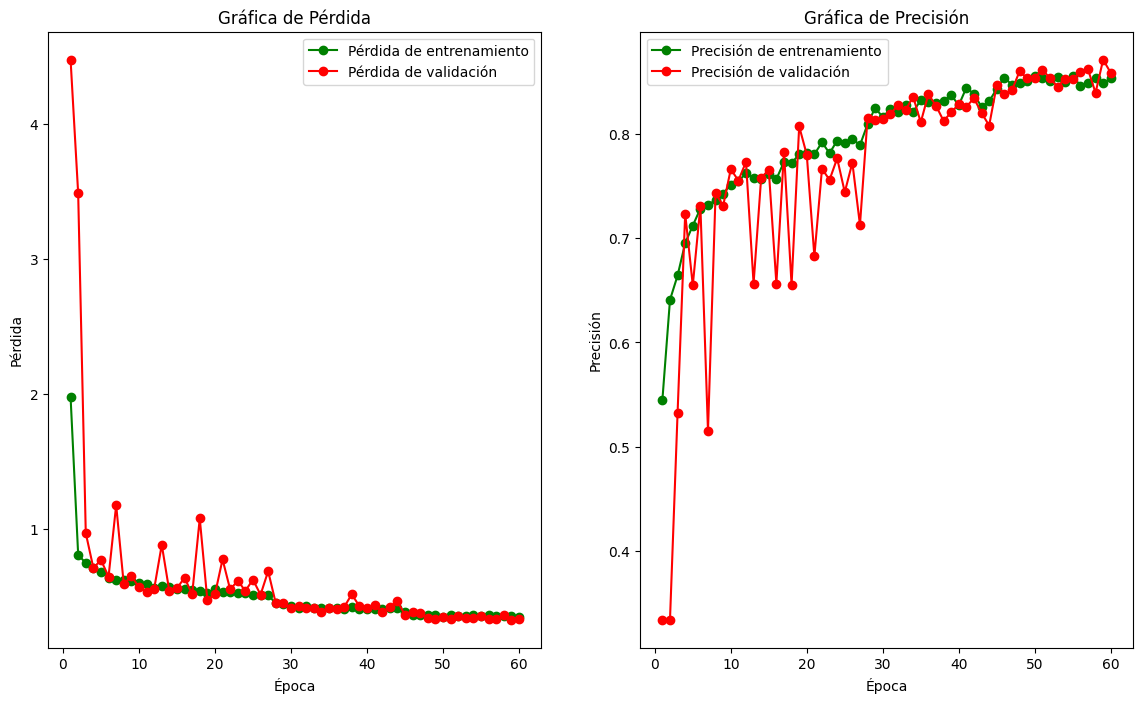

In [ ]:
print('\n RENDIMIENTO ENTRENAMIENTO:')
evaluar_rendimiento_validacion(train_loss,train_acc, val_loss, val_acc)

### ENTRENAMIENTO

AQUI SE ENTRENA EL MODELO CON TODOS LOS DATOS Y UNA EPOCA CONCRETA

METER LOS CALLBACKS PERSONALIZADOS

Como se puede observar en nuestro modelo final alcanza su máxima precisión en la época 94. Aunque a partir de la 40 se puede ver que comienza a sobrentrenar, no será hasta la época 94 que esto empezará a provocar que el modelo deje de generalizar y empiece a sobreentrenar perjudicando la preecisión y dejando de mejorar. Así, entrenamos nuestro modelo ahora con todo el conjunto de datos de entrenamiento original (X e y_categorical).

No obstante, surge un problema. Se observa que el modelo ha mejorado su rendimiento gracias a una técnica explicada ya anteriormente denominado 'ReduceLROnPlateau'. Esta técnica se basa en la pérdida de validación, la cual ahora cuando se va a entrenar el modelo con todo el conjunto de entrenamiento, no está presente.

Así, para mantener el efecto brindado por este callback, se desarrolla un callback personalizado, el cuál simplemente, de manera manual, aplica el efecto de 'ReduceLROnPlateau' en la época en la que tuvo su mejor efecto, que fue la época 92.

Nótese lo siguiente, nosotros hemos ajustado a la época 92 debido a que, en nuestro entrenamiento es donde se dio este salto significativo debido a 'ReduceLROnPlateau'. Cabe destacar que, debido a la inicialización aleatoria de los pesos en cada ejecución, el efecto de este callback puede ser en distintas épocas por cada ejecución, por lo tanto, para sacar el mejor rendimiento al código siguiente, se debe ajustar con cada ejecución.

Esto se hace mediante el siguiente código:

In [ ]:
class LearningRateMultiplier(Callback):
    def __init__(self, epoch_to_multiply, lr_multiplier):
        super().__init__()
        self.epoch_to_multiply = epoch_to_multiply
        self.lr_multiplier = lr_multiplier

    def on_epoch_begin(self, epoch, logs=None):
        if epoch in self.epoch_to_multiply:
            old_lr = float(K.get_value(self.model.optimizer.lr))
            new_lr = old_lr * self.lr_multiplier
            K.set_value(self.model.optimizer.lr, new_lr)
            print(f"\nChanged learning rate from {old_lr} to {new_lr} at epoch {epoch + 1}\n")

# Crear el callback para cambiar la tasa de aprendizaje en la época: multiplicándola por 0.3.
cambio_lr_callback = LearningRateMultiplier(epoch_to_multiply=[], lr_multiplier=0.1)

Y con esto, finalmente, se entrena el modelo con todo el conjunto de entrenamiento original hasta la época óptima seleccionada.

In [ ]:
# Definir el modelo
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (128,128,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 4096 , activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(units = 2048 , activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(units = 1024 , activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(units = 3 , activation = 'softmax'))
# Compila el modelo
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Entrena el modelo
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience = 8,
                                            verbose=1,
                                            factor=0.3,
                                            min_lr=0.00000001)

history = model.fit(datagen.flow(train_X,train_y, batch_size = 16),
                    epochs = 60 , validation_data = datagen.flow(train_X,train_y),
                    callbacks = [cambio_lr_callback])

train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

print('\n RENDIMIENTO ENTRENAMIENTO:')
evaluar_rendimiento_validacion(train_loss,train_acc, val_loss, val_acc)

# 6.0 ESTUDIO DE LOS RESULTADOS

## PRECISIÓN DEL TEST

HACEMOS EL TEST CON EL ÚLTIMO MODELO ELEGIDO

In [ ]:
test_loss, test_acc = model.evaluate(test_X, test_y_categorical, verbose=0)

print('Test accuracy:', test_acc)

Test accuracy: 0.8120805621147156


## CLASIFICATION REPORT

In [ ]:
# Predecimos la etiqueta utilizando el modelo final
predictions = model.predict(test_X)

# Convertir las predicciones a etiquetas enteras
predicted_labels = np.argmax(predictions, axis=1)

# Contar cuántas predicciones son correctas
correct_predictions = np.sum(predicted_labels == np.argmax(test_y_categorical, axis=1))

print(f'Número de predicciones correctas: {correct_predictions}')
print(f'Número de predicciones totales: {len(predictions)}')

28/28 [==============================] - 0s 8ms/step
Número de predicciones correctas: 726
Número de predicciones totales: 894


In [ ]:
print(classification_report(test_y, predicted_labels, target_names = ['Normal (Class 0)','Bacterial (Class 1)','Virica (Class 2)']))

                     precision    recall  f1-score   support

   Normal (Class 0)       0.89      0.97      0.93       298
Bacterial (Class 1)       0.78      0.76      0.77       298
   Virica (Class 2)       0.75      0.71      0.73       298

           accuracy                           0.81       894
          macro avg       0.81      0.81      0.81       894
       weighted avg       0.81      0.81      0.81       894



## VISUALIZACIÓN DE LAS PREDICCIONES

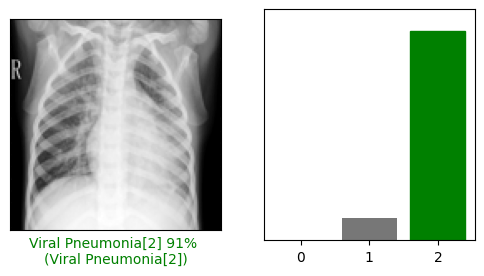

<Figure size 640x480 with 0 Axes>

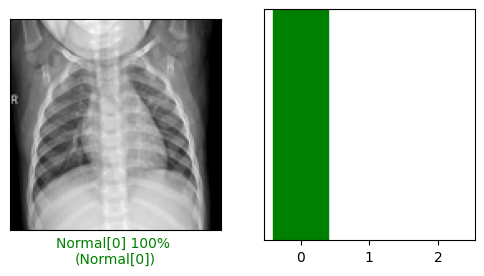

<Figure size 640x480 with 0 Axes>

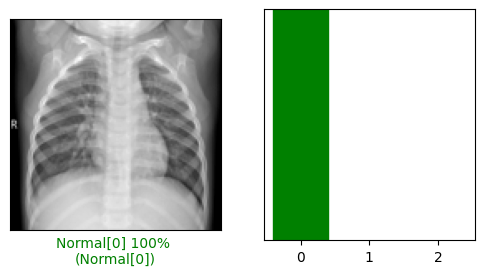

<Figure size 640x480 with 0 Axes>

In [ ]:
for i in range(3):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_y, test_X)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_y)
  plt.show()
  plt.clf()

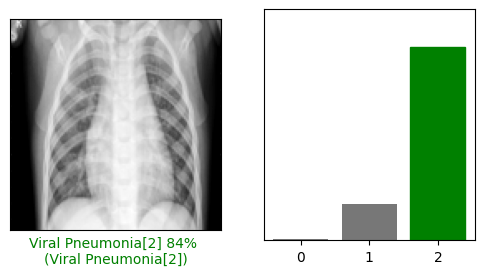

<Figure size 640x480 with 0 Axes>

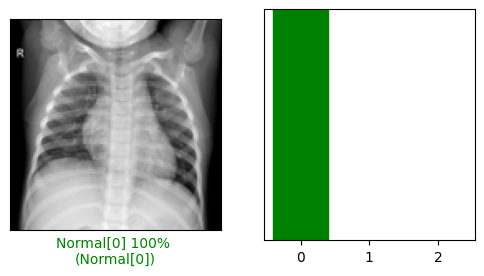

<Figure size 640x480 with 0 Axes>

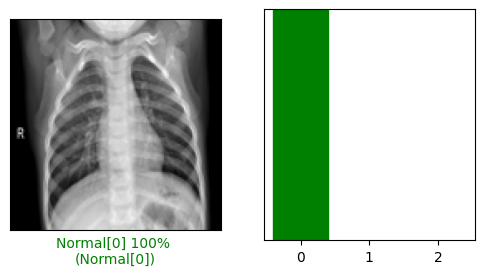

<Figure size 640x480 with 0 Axes>

In [ ]:
for i in range(250,253):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_y, test_X)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_y)
  plt.show()
  plt.clf()

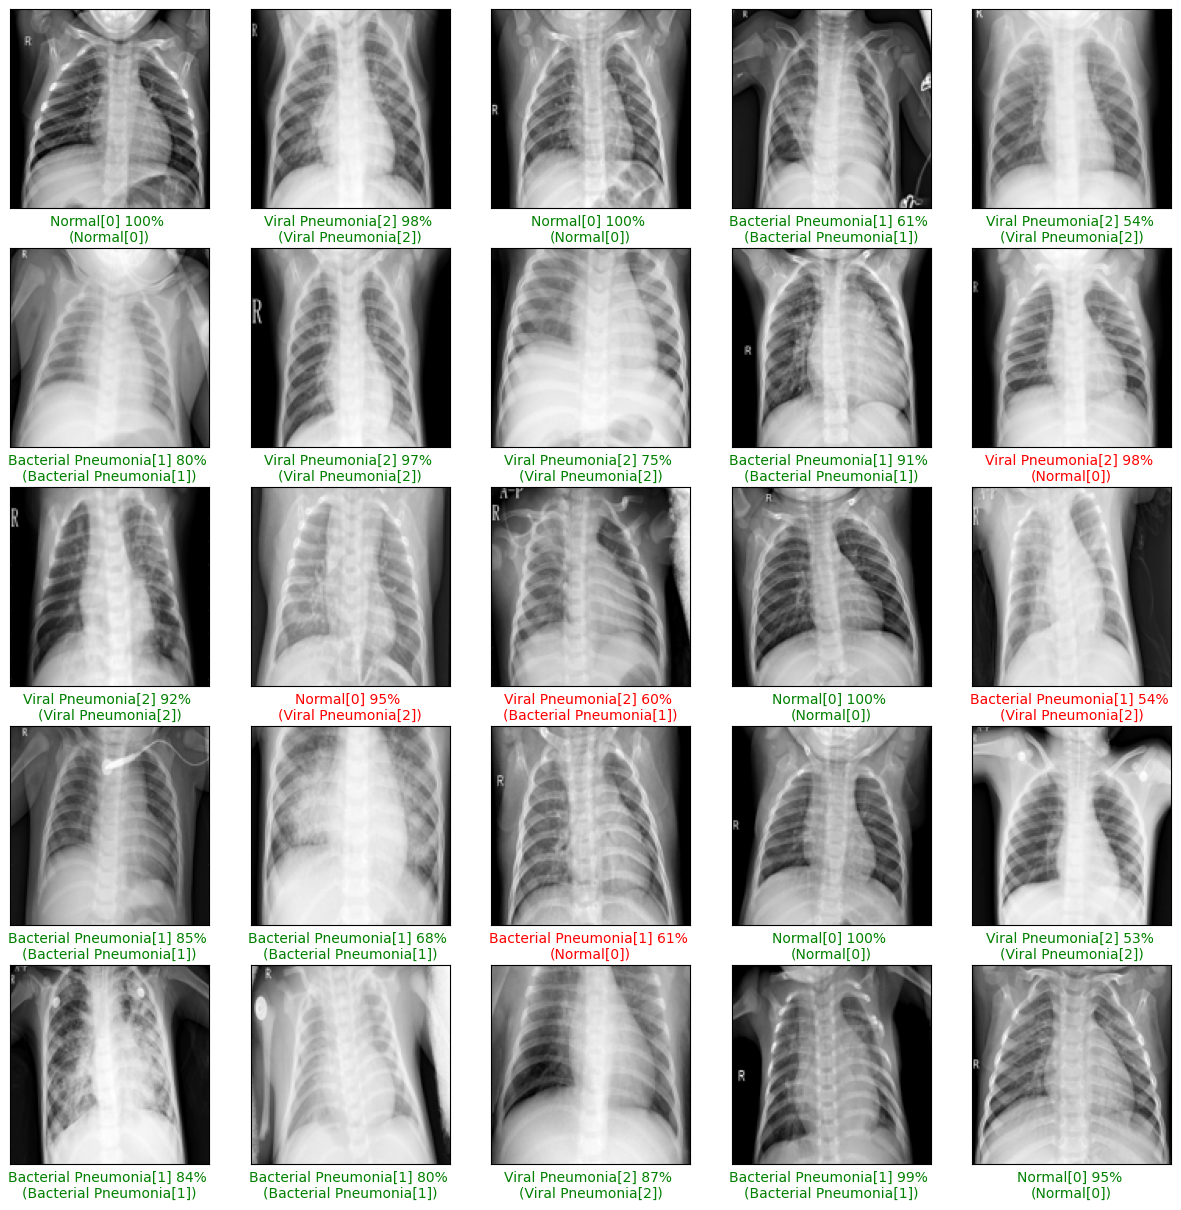

In [ ]:
# Selecciona 25 índices aleatorios
indices = np.random.choice(len(predictions), 25, replace=False)

# Crea una figura de 5x5
plt.figure(figsize=(15,15))

for i in range(5):
    for j in range(5):
        # Calcula el índice en la lista de índices aleatorios
        index = i * 5 + j

        # Crea un subplot en la posición i, j
        plt.subplot(5, 5, index+1)

        # Llama a la función plot_image con el índice aleatorio
        plot_image(indices[index], predictions[indices[index]], test_y, test_X)

# Muestra la figura
plt.show()

## MATRIZ DE CONFUSIÓN

EXPLICAR LOS TIPOS DE ERROR

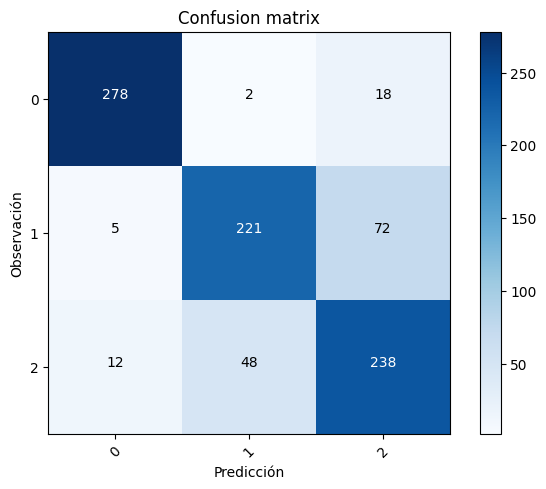

<Figure size 640x480 with 0 Axes>

In [ ]:
# Convertir en predicciones de clases desde los vectores one-hot encoding
Y_pred_classes = np.argmax(predictions, axis = 1)

# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = test_y  # Aquí se ha cambiado 'np.argmax(test_labels)' por 'test_labels'

# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

plot_confusion_matrix(confusion_mtx, classes = range(3))

ESTUDIAR LA MATRIZ DE CONFUSION CUANDO EL MODELO DA MUCHA PRECISION

                     precision    recall  f1-score   support

   Normal (Class 0)       0.95      0.94      0.95       287
Bacterial (Class 1)       0.91      0.80      0.85       216
   Virica (Class 2)       0.77      0.87      0.82       211

           accuracy                           0.88       714
          macro avg       0.88      0.87      0.87       714
       weighted avg       0.89      0.88      0.88       714



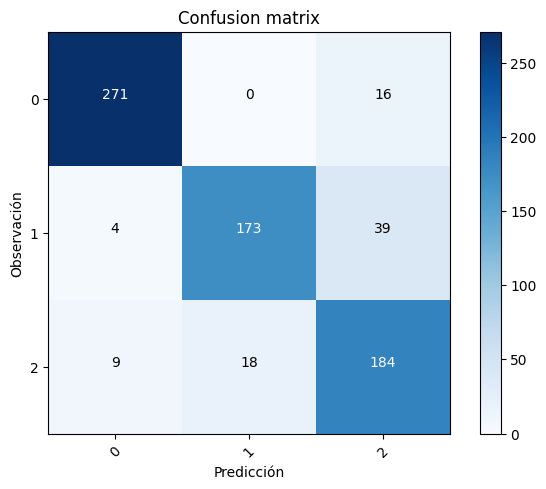

<Figure size 640x480 with 0 Axes>

In [ ]:
max_pred = np.max(predictions, axis=1)

# Identificar las predicciones con mucha seguridad
selected_predictions = (max_pred <= 0.3) | (max_pred >= 0.7)
selected_test_y = test_y[selected_predictions]

# Convertir en predicciones de clases desde los vectores one-hot encoding
Y_pred_classes = np.argmax(predictions, axis = 1)[selected_predictions]


# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = selected_test_y  # Aquí se ha cambiado 'np.argmax(test_labels)' por 'test_labels'

# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

print(classification_report(Y_true,
                            Y_pred_classes,
                            target_names = ['Normal (Class 0)','Bacterial (Class 1)','Virica (Class 2)']))

plot_confusion_matrix(confusion_mtx, classes = range(3))

## TIPO DE ERROR

1. **Error Tipo I (falso positivo):** Un error tipo I ocurre cuando se rechaza incorrectamente una hipótesis nula que es verdadera. Implica concluir erróneamente que hay evidencia suficiente para rechazar una hipótesis nula cuando, de hecho, la hipótesis nula es verdadera.

  Ejemplo: Supongamos que realizamos una prueba de hipótesis para determinar si un nuevo medicamento es efectivo. La hipótesis nula podría ser que el medicamento no tiene efecto, y la hipótesis alternativa sería que el medicamento es efectivo. Si cometemos un error tipo I, estaríamos concluyendo que el medicamento es efectivo cuando, en realidad, no lo es.

  **En nuestro caso, cometer un error tipo I sería predecir que alguien tiene neumonía cuando realmente no la tiene.**

2. **Error Tipo II (falso negativo):** Un error tipo II ocurre cuando no se rechaza la hipótesis nula cuando la hipótesis alternativa es verdadera. Implica no detectar un efecto real cuando, de hecho, existe.

  Ejemplo: Siguiendo el ejemplo anterior del medicamento, un error tipo II ocurriría si concluimos que el medicamento no es efectivo cuando en realidad sí lo es. Esto puede ser problemático, especialmente si el medicamento tiene un efecto positivo que podría mejorar la salud de las personas.

  **En nuestro caso, cometer un error tipo II sería predecir que alguien no tiene neumonía cuando SÍ la tiene.**

Estos dos tipos de errores están inversamente relacionados. Al aumentar la sensibilidad de una prueba (haciéndola más propensa a detectar efectos si existen), se tiende a aumentar el riesgo de cometer un error tipo I. Por otro lado, al disminuir la probabilidad de cometer un error tipo I, se aumenta la probabilidad de cometer un error tipo II.

Este concepto estadístico divide los errores que se pueden cometer al realizar pruebas de hipótesis en 2 tipos:

### Error Tipo I (Falso positivo):
**Definición**: Ocurre cuando se rechaza incorrectamente una hipótesis nula (h0) verdadera.

**Ejemplo**: Supongamos que estás realizando pruebas para determinar si un individuo está o no enfermo. El error Tipo I ocurriría si concluyes erróneamente que el individuo está enfermo cuando, en realidad, está sano.


### Error Tipo II (Falso negativo):
**Definición**: Ocurre cuando se falla en rechazar una hipótesis nula falsa.


**Ejemplo**: Supongamos que estás realizando pruebas para determinar si un individuo está o no enfermo. El error Tipo II ocurriría si concluyes erróneamente que el individuo está sano cuando, en realidad, está enfermo. En este caso, la prueba no logró detectar la enfermedad existente.



Estos errores son inevitables en la toma de decisiones estadísticas y siempre existirá un equilibrio entre ellos. Ajustar el estudio para minimizarlos es importante, y dependiendo del tipo de estudio hay un tipo de error más dañino que otro.

Vemos que, en nuestro caso particular, los errores tipo II son más dañinos, ya que un falso negativo puede resultar en una enfermedad que se deje sin tratar, lo que provoca unos daños humanos más graves.
La decisión tomada para evitar este tipo de error es no balancear de forma simétrica las imágenes con las que se alimentan a la red neuronal.

## ENTENDER EL MODELO

JORGE HAGA LO DE VER ROJOS Y AZUKES PARA VER QUE PARTE DE LA IMAGEN ES LA QUE HACE QUE EL MODELO ACEPTE O PREDIGA ALGO

# 7.0 CONCLUSIONES

## 7.1 POSIBLES APLICACIONES

## 7.2 TRABAJO A FUTURO